# 1. Introduction

-----

**Nama :** Rhesa Akbar Elvarettano

**Objective:** Tujuan dalam projek ini untuk melakukan analisa data pada data jamaah umroh 1445H untuk mengetahui ciri-ciri jamaah umroh.

-----

# 2. Identifikasi Masalah

## 2.1 Latar Belakang

Karena jamaah umroh di Fandiego Travel ini sangat banyak sehingga kami ingin mengetahui ciri-ciri dari jamaah umroh kami diambil dari data jamaah umroh 1445 Hijriah sampai bulan april 2024, supaya setelah mengetahui ciri-ciri orang yg umroh pada travel kami, kami bisa lebih tepat sasaran dalam melakukan markteting dan lebih optimal dalam melakukan markteting.

## 2.2 Defining the problem

1. Gender apa yang paling banyak dari jamaah umroh 1445 Hijriah? Kenapa?

2. Kapan tanggal keberangkatan paling banyak dari jamaah umroh 1445 Hijriah? Kenapa?

3. Pesawat apa yang paling banyak digunakan oleh jamaah umroh 1445 Hijriah? Kenapa?

4. Paket umroh berapa hari atau durasi perjalanan berapa hari yang paling banyak diminati oleh jamaah umroh 1445 Hijriah? Kenapa?

5. Dimana 20 tempat Kelahiran paling banyak dari jamaah umroh 1445 Hijriah? Kenapa?

6. Paling banyak jamaah umroh usia berapa? dari kelompok usia apa? 

7. Dimana 20 tempat paling banyak menerbitkan paspor atau dokumen?

8. Hubungan apa yang paling banyak?

9. Preferensi kamar apa yang paling banyak disukai oleh jamaah umroh 1445H?

10. Siapa agent yang paling banyak mendaftarakan jamaah umroh 1445H?

11. Berapa harga paket yang paling diminati oleh jamaah umroh 1445H?

-----

# 2. Import Libraries

In [1]:
# import library

import pandas as pd
import numpy as np
from scipy import stats

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Warning
import warnings
warnings.filterwarnings('ignore') #turn off warning

# 3. Menggabungkan Sheet yang banyak menjadi 1 sheet pada MS. Excel

In [2]:
# Nama file Excel
file_excel = 'New - Update - Wisata Hati 1445H atau 2024.xlsx'

# Membaca semua sheet
xls = pd.ExcelFile(file_excel)

# List untuk menyimpan data frame
df_list = []

# Loop melalui semua sheet dan tambahkan ke list
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    df_list.append(df)

# Menggabungkan semua data frame menjadi satu
df_all = pd.concat(df_list, ignore_index=True)

# Menyimpan hasil gabungan ke file Excel baru
df_all.to_excel('New_data_jamaah_umroh1445H.xlsx', index=False)


In [3]:
# Mengubah file Excel yang telah digabungkan menjadi file CSV
df_all.to_csv('New_data_jamaah_umroh1445H.csv', index=False)

# 4. Data Loading

In [4]:
# load data asli
df_ori = pd.read_csv('New_data_jamaah_umroh1445H.csv')

In [5]:
# Untuk menjaga  data asli supaya tidak berubah dan hilang
df = df_ori.copy()

In [6]:
# Untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Menampilkan dataset jamaah umroh 1445 Hijriah
df

,No.,NAME ON PASSPORT,GENDER,BERANGKAT,PESAWAT,DURASI,PLACE OF BIRTH,DATE OF BIRTH,UMUR,ISSUED PLACE,RELATION,ROOMLIST,AGENT,PRICE,KETERANGAN,No.,NO,Unnamed: 15
0,1.0,YUHENI KARTAM MUHIDIN,F,2023-07-25 00:00:00,Saudi Arabian Airlines,12 days,PURWAKARTA,1984-03-31 00:00:00,40,SUKABUMI,SINGLE,QUAD,Lintang,TL,DARI SV 10 MEI 2023,NaN,NaN,NaN
1,2.0,FARIDA SALEHA,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,LEWOLEBA,1999-08-28 00:00:00,24,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2024,NaN,NaN,NaN
2,3.0,WA ODE KAMBA,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,SAGU,1967-08-20 00:00:00,56,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2025,NaN,NaN,NaN
3,4.0,SITI SARAH ABDULLAH GEHAK,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,LAMAHALA,1957-08-30 00:00:00,66,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2026,NaN,NaN,NaN
4,5.0,ENDANG PUSPOWATI,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,JAKARTA,1968-10-14 00:00:00,55,DEPOK,SINGLE,QUAD,Lintang,29.9,DARI SV 10 MEI 2027,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,NaN,SOFIYANI MOHAMMAD TOHA,F,2024-04-28 00:00:00,Emirates,10 days,BREBES,1977-10-18 00:00:00,46,PEMALANG,FAMILY,DOUBLE,Lintang,28.9,NaN,39,NaN,NaN
5311,NaN,SUNGGING GIRI ARTANTO,M,2024-04-28 00:00:00,Emirates,10 days,NGAWI,1988-12-31 00:00:00,35,JAKARTA SELATAN,single,QUAD,Lintang,28.9,NaN,40,NaN,NaN
5312,NaN,SYAMSUDDIN SYAH,M,2024-04-28 00:00:00,Emirates,10 days,JAKARTA PUSAT,1987-03-14 00:00:00,37,JAKARTA TIMUR,single,TRIPLE,Yenni,28.9,NaN,41,NaN,NaN
5313,NaN,NOOR ICHA ARIDINI,F,2024-04-28 00:00:00,Emirates,10 days,PURBALINGGA,1989-05-18 00:00:00,35,JAKARTA TIMUR,single,TRIPLE,Yenni,28.9,NaN,42,NaN,NaN


In [7]:
# Menampilkan 5 baris teratas dari dataset
df.head()

,No.,NAME ON PASSPORT,GENDER,BERANGKAT,PESAWAT,DURASI,PLACE OF BIRTH,DATE OF BIRTH,UMUR,ISSUED PLACE,RELATION,ROOMLIST,AGENT,PRICE,KETERANGAN,No.,NO,Unnamed: 15
0,1.0,YUHENI KARTAM MUHIDIN,F,2023-07-25 00:00:00,Saudi Arabian Airlines,12 days,PURWAKARTA,1984-03-31 00:00:00,40,SUKABUMI,SINGLE,QUAD,Lintang,TL,DARI SV 10 MEI 2023,NaN,NaN,NaN
1,2.0,FARIDA SALEHA,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,LEWOLEBA,1999-08-28 00:00:00,24,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2024,NaN,NaN,NaN
2,3.0,WA ODE KAMBA,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,SAGU,1967-08-20 00:00:00,56,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2025,NaN,NaN,NaN
3,4.0,SITI SARAH ABDULLAH GEHAK,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,LAMAHALA,1957-08-30 00:00:00,66,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2026,NaN,NaN,NaN
4,5.0,ENDANG PUSPOWATI,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,JAKARTA,1968-10-14 00:00:00,55,DEPOK,SINGLE,QUAD,Lintang,29.9,DARI SV 10 MEI 2027,NaN,NaN,NaN


In [8]:
# Menampilkan 5 baris terbawah dari dataset
df.tail()

,No.,NAME ON PASSPORT,GENDER,BERANGKAT,PESAWAT,DURASI,PLACE OF BIRTH,DATE OF BIRTH,UMUR,ISSUED PLACE,RELATION,ROOMLIST,AGENT,PRICE,KETERANGAN,No.,NO,Unnamed: 15
5310,NaN,SOFIYANI MOHAMMAD TOHA,F,2024-04-28 00:00:00,Emirates,10 days,BREBES,1977-10-18 00:00:00,46,PEMALANG,FAMILY,DOUBLE,Lintang,28.9,NaN,39,NaN,NaN
5311,NaN,SUNGGING GIRI ARTANTO,M,2024-04-28 00:00:00,Emirates,10 days,NGAWI,1988-12-31 00:00:00,35,JAKARTA SELATAN,single,QUAD,Lintang,28.9,NaN,40,NaN,NaN
5312,NaN,SYAMSUDDIN SYAH,M,2024-04-28 00:00:00,Emirates,10 days,JAKARTA PUSAT,1987-03-14 00:00:00,37,JAKARTA TIMUR,single,TRIPLE,Yenni,28.9,NaN,41,NaN,NaN
5313,NaN,NOOR ICHA ARIDINI,F,2024-04-28 00:00:00,Emirates,10 days,PURBALINGGA,1989-05-18 00:00:00,35,JAKARTA TIMUR,single,TRIPLE,Yenni,28.9,NaN,42,NaN,NaN
5314,NaN,HIMADA HANBAL,M,2024-04-28 00:00:00,Emirates,10 days,BEKASI,2020-08-02 00:00:00,3,JAKARTA TIMUR,single,TRIPLE,Yenni,28.9,disct child 1jt,43,NaN,NaN


# 5. Data Cleaning

## 5.1 Menghapus kolom yang tidak perlu

In [9]:
# Menampilkan nama semua kolom
df.columns

Index(['No.', 'NAME ON PASSPORT', 'GENDER', 'BERANGKAT', 'PESAWAT', 'DURASI',
       'PLACE OF BIRTH', 'DATE OF BIRTH', 'UMUR', 'ISSUED PLACE', 'RELATION',
       'ROOMLIST', 'AGENT', 'PRICE', 'KETERANGAN', 'No. ', 'NO',
       'Unnamed: 15'],
      dtype='object')

In [10]:
# Penghapusan kolom karena tidak digunakan
df.drop(['No.', 'No. ', 'NO', 'DATE OF BIRTH', 'Unnamed: 15'], axis=1, inplace= True)
df

,NAME ON PASSPORT,GENDER,BERANGKAT,PESAWAT,DURASI,PLACE OF BIRTH,UMUR,ISSUED PLACE,RELATION,ROOMLIST,AGENT,PRICE,KETERANGAN
0,YUHENI KARTAM MUHIDIN,F,2023-07-25 00:00:00,Saudi Arabian Airlines,12 days,PURWAKARTA,40,SUKABUMI,SINGLE,QUAD,Lintang,TL,DARI SV 10 MEI 2023
1,FARIDA SALEHA,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,LEWOLEBA,24,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2024
2,WA ODE KAMBA,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,SAGU,56,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2025
3,SITI SARAH ABDULLAH GEHAK,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,LAMAHALA,66,MAUMERE,FAMILY,QUAD,Lintang,29.9,DARI SV 10 MEI 2026
4,ENDANG PUSPOWATI,F,2023-07-25 00:00:00,Saudi Arabian Airlines,11 days,JAKARTA,55,DEPOK,SINGLE,QUAD,Lintang,29.9,DARI SV 10 MEI 2027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,SOFIYANI MOHAMMAD TOHA,F,2024-04-28 00:00:00,Emirates,10 days,BREBES,46,PEMALANG,FAMILY,DOUBLE,Lintang,28.9,NaN
5311,SUNGGING GIRI ARTANTO,M,2024-04-28 00:00:00,Emirates,10 days,NGAWI,35,JAKARTA SELATAN,single,QUAD,Lintang,28.9,NaN
5312,SYAMSUDDIN SYAH,M,2024-04-28 00:00:00,Emirates,10 days,JAKARTA PUSAT,37,JAKARTA TIMUR,single,TRIPLE,Yenni,28.9,NaN
5313,NOOR ICHA ARIDINI,F,2024-04-28 00:00:00,Emirates,10 days,PURBALINGGA,35,JAKARTA TIMUR,single,TRIPLE,Yenni,28.9,NaN


## 5.2 Menyesuaikan Tipe Data

In [11]:
# Menampilkan informasi tentang tipe data dan info lainnya.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME ON PASSPORT  5315 non-null   object
 1   GENDER            5315 non-null   object
 2   BERANGKAT         5315 non-null   object
 3   PESAWAT           5315 non-null   object
 4   DURASI            5315 non-null   object
 5   PLACE OF BIRTH    5314 non-null   object
 6   UMUR              5315 non-null   object
 7   ISSUED PLACE      5310 non-null   object
 8   RELATION          5258 non-null   object
 9   ROOMLIST          5285 non-null   object
 10  AGENT             5198 non-null   object
 11  PRICE             5229 non-null   object
 12  KETERANGAN        1465 non-null   object
dtypes: object(13)
memory usage: 539.9+ KB


dari informasi kolom diatas, terdapat beberapa kolom yg tipe datanya salah, seperti kolom: BERANGKAT, DURASI, UMUR, PRICE

In [12]:
# Konversi kolom 'BERANGKAT' ke tipe datetime dengan mengabaikan kesalahan
df['BERANGKAT'] = pd.to_datetime(df['BERANGKAT'], errors='coerce')

# Konversi kolom 'DURASI' menjadi numerik (mengambil angka dari string)
df['DURASI'] = df['DURASI'].str.extract('(\d+)').astype(float)

# Konversi kolom 'UMUR' ke tipe numerik, mengabaikan kesalahan
df['UMUR'] = pd.to_numeric(df['UMUR'], errors='coerce')

# Konversi kolom 'PRICE' ke tipe numerik, mengabaikan kesalahan
df['PRICE'] = pd.to_numeric(df['PRICE'], errors='coerce')

In [13]:
# Menampilkan informasi tentang tipe data setelah diubah tipe datanya.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NAME ON PASSPORT  5315 non-null   object        
 1   GENDER            5315 non-null   object        
 2   BERANGKAT         5014 non-null   datetime64[ns]
 3   PESAWAT           5315 non-null   object        
 4   DURASI            5315 non-null   float64       
 5   PLACE OF BIRTH    5314 non-null   object        
 6   UMUR              5314 non-null   float64       
 7   ISSUED PLACE      5310 non-null   object        
 8   RELATION          5258 non-null   object        
 9   ROOMLIST          5285 non-null   object        
 10  AGENT             5198 non-null   object        
 11  PRICE             5082 non-null   float64       
 12  KETERANGAN        1465 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 539.9+ KB


dari informasi diatas tipe data semua kolom sudah benar tapi, masih banyak missing value di beberapa kolom

## 5.3 Handling Missing Values & Check Duplicate data

In [14]:
# Mengisi missing values dengan nilai mean untuk kolom numerik
df['BERANGKAT'].fillna(df['BERANGKAT'].mode()[0], inplace=True)
df['DURASI'].fillna(df['DURASI'].mean(), inplace=True)
df['UMUR'].fillna(df['UMUR'].mean(), inplace=True)
df['PRICE'].fillna(df['PRICE'].mean(), inplace=True)

# Mengisi missing values dengan nilai mode (nilai yang paling sering muncul) untuk kolom kategorikal
df['PLACE OF BIRTH'].fillna(df['PLACE OF BIRTH'].mode()[0], inplace=True)
df['ISSUED PLACE'].fillna(df['ISSUED PLACE'].mode()[0], inplace=True)
df['RELATION'].fillna(df['RELATION'].mode()[0], inplace=True)
df['ROOMLIST'].fillna(df['ROOMLIST'].mode()[0], inplace=True)
df['AGENT'].fillna(df['AGENT'].mode()[0], inplace=True)
df['KETERANGAN'].fillna('Tidak Ada Keterangan', inplace=True)


In [15]:
# Mengecek kembali nilai missing value setiap kolom
df.isnull().sum()

NAME ON PASSPORT    0
GENDER              0
BERANGKAT           0
PESAWAT             0
DURASI              0
PLACE OF BIRTH      0
UMUR                0
ISSUED PLACE        0
RELATION            0
ROOMLIST            0
AGENT               0
PRICE               0
KETERANGAN          0
dtype: int64

Setelah dilakukan handling missing value pada setiap kolom dan setelah mengeceknya kembali hasilnya sudah tidak ada missing value

In [16]:
# check duplicated data
df.duplicated().sum()

0

Tidak ada duplikat data

## 5.4 Merapikan nama-nama kolom

In [17]:
# Change column name to lower case
df.columns = df.columns.str.lower()

# Remove "(" and ")" in column name
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

# Change whitespace in column name with ("_")
df.columns = df.columns.str.replace(' ','_')

In [18]:
# Mengubah nama kolom 'berangkat' menjadi 'tanggal_keberangkatan'
df.rename(columns={'berangkat': 'tanggal_keberangkatan'}, inplace=True)
# Mengubah nama kolom 'berangkat' menjadi 'tanggal_keberangkatan'
df.rename(columns={'umur': 'usia'}, inplace=True)

In [19]:
# Show columns
df.columns

Index(['name_on_passport', 'gender', 'tanggal_keberangkatan', 'pesawat',
       'durasi', 'place_of_birth', 'usia', 'issued_place', 'relation',
       'roomlist', 'agent', 'price', 'keterangan'],
      dtype='object')

Dapat dilihat setelah dirapikan nama-nama kolom, terlihat nama kolom lebih rapi dan enak dilihat.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name_on_passport       5315 non-null   object        
 1   gender                 5315 non-null   object        
 2   tanggal_keberangkatan  5315 non-null   datetime64[ns]
 3   pesawat                5315 non-null   object        
 4   durasi                 5315 non-null   float64       
 5   place_of_birth         5315 non-null   object        
 6   usia                   5315 non-null   float64       
 7   issued_place           5315 non-null   object        
 8   relation               5315 non-null   object        
 9   roomlist               5315 non-null   object        
 10  agent                  5315 non-null   object        
 11  price                  5315 non-null   float64       
 12  keterangan             5315 non-null   object        
dtypes: 

In [21]:
# check nilai unique pada setiap kolom dalam dataframe 
df.nunique()

name_on_passport         5185
gender                      6
tanggal_keberangkatan     104
pesawat                    10
durasi                     11
place_of_birth            799
usia                       90
issued_place              150
relation                    8
roomlist                   15
agent                     152
price                      58
keterangan                444
dtype: int64

# 6. Exploratory Data Analysis (EDA)

## 6.1 Kolom Gender

In [22]:
df['gender'].unique()

array(['F', 'M', 'M\n', 'M ', 'F ', ' M'], dtype=object)

In [23]:
# Menghapus spasi dan newline di kolom 'gender'
df['gender'] = df['gender'].str.strip()

# Mengganti karakter newline dengan spasi kosong
df['gender'] = df['gender'].str.replace('\n', '')

# Mengganti nilai yang salah dengan nilai yang benar
df['gender'] = df['gender'].replace({'M\n': 'M', 'M ': 'M', ' M': 'M'})

# Mengganti nilai yang salah dengan nilai yang benar
df['gender'] = df['gender'].replace({'F ': 'F'})

In [24]:
# Memastikan nilai dalam kolom 'gender' hanya 'F' dan 'M'
print(df['gender'].unique())

['F' 'M']


In [25]:
# Menghitung frekuensi setiap gender
gender_counts = df['gender'].value_counts()
gender_counts

gender
F    3270
M    2045
Name: count, dtype: int64

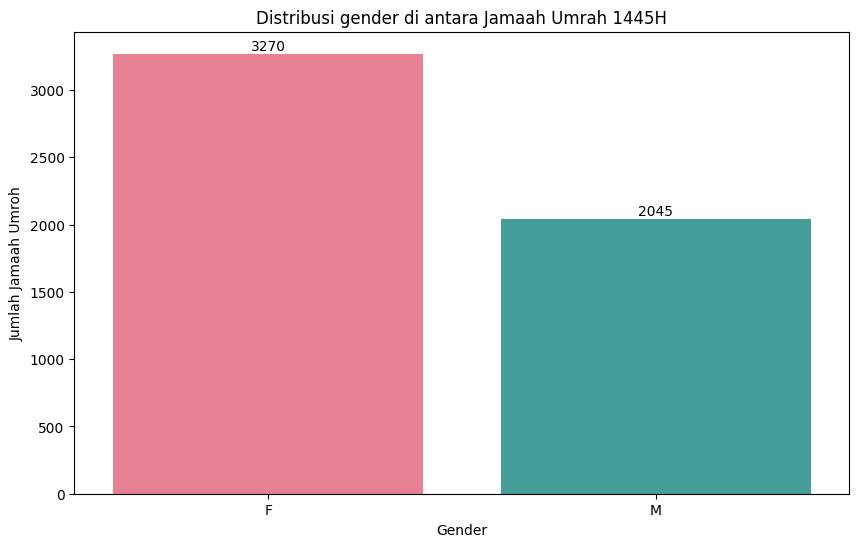

In [26]:
# Visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='husl')

# Menambahkan nilai di atas setiap batang
for index, value in enumerate(gender_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribusi gender di antara Jamaah Umrah 1445H')
plt.xlabel('Gender')
plt.ylabel('Jumlah Jamaah Umroh')
plt.show()


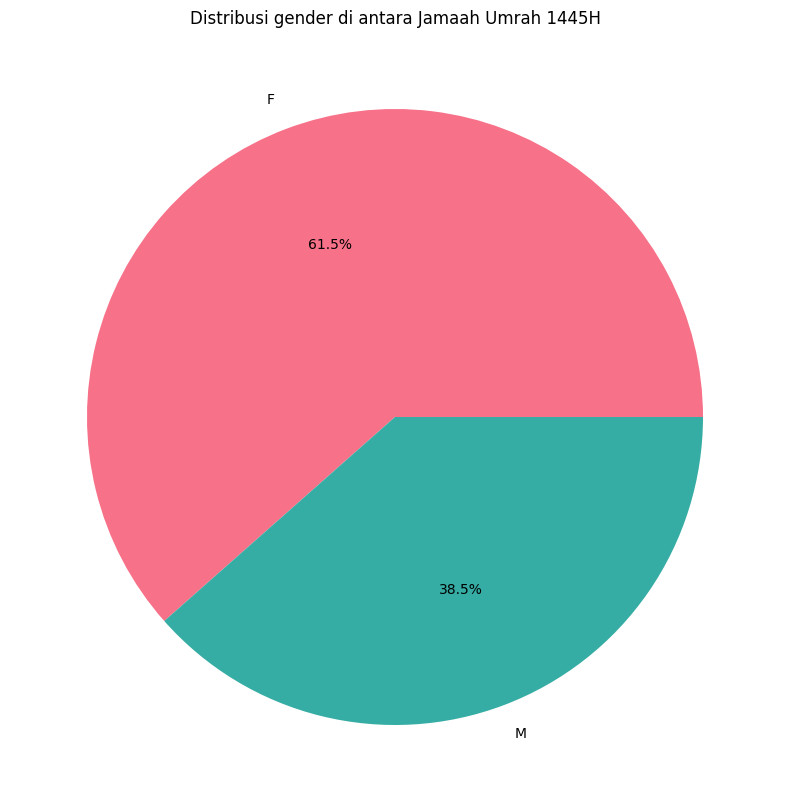

In [27]:
# Membuat pie chart
plt.figure(figsize=(20, 10))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(gender_counts)))
plt.title('Distribusi gender di antara Jamaah Umrah 1445H')
plt.show()

**Insights:** 

1. Pengembangan Produk dan Layanan yang Terfokus pada Wanita:
- Layanan Khusus: Mengembangkan layanan khusus untuk wanita, seperti paket umroh yang menyediakan akomodasi dan transportasi yang ramah wanita. Ini bisa termasuk ruang shalat khusus wanita, penginapan dengan fasilitas yang nyaman dan aman untuk wanita, serta transportasi yang mempertimbangkan kebutuhan wanita.
- Program Pendampingan: Menawarkan program pendampingan khusus wanita, termasuk pendamping wanita untuk membantu mereka selama perjalanan umroh.
2. Kampanye Pemasaran yang Disesuaikan:
- Pemasaran yang Terfokus: Meningkatkan upaya pemasaran yang ditargetkan pada wanita, menggunakan saluran pemasaran yang populer di kalangan wanita, seperti media sosial, komunitas online wanita, dan platform yang sering digunakan oleh wanita.
- Testimoni dan Kisah Sukses: Menampilkan testimoni dan kisah sukses dari jamaah wanita yang telah menggunakan layanan umroh Anda, untuk menarik lebih banyak pelanggan wanita.
3. Pendidikan dan Pelatihan:
- Seminar dan Workshop: Mengadakan seminar dan workshop yang memberikan informasi dan edukasi khusus bagi wanita tentang persiapan umroh, termasuk kesehatan, keselamatan, dan kebutuhan spiritual selama perjalanan.
- Materi Informasi: Menyediakan materi informasi yang khusus bagi wanita, seperti panduan berpakaian, tips kesehatan selama perjalanan, dan panduan ibadah yang sesuai dengan kebutuhan wanita.
4. Kerja Sama dengan Organisasi Wanita:
- Kolaborasi: Bekerja sama dengan organisasi wanita dan komunitas untuk mempromosikan paket umroh, menawarkan diskon grup, dan memberikan presentasi tentang layanan umroh khusus wanita.
- Sponsor dan Event: Menjadi sponsor dalam acara-acara yang diadakan oleh organisasi wanita untuk meningkatkan brand awareness dan menarik lebih banyak jamaah wanita.
5. Fasilitas Tambahan:
- Konsultasi Kesehatan: Menyediakan layanan konsultasi kesehatan khusus wanita sebelum keberangkatan untuk memastikan mereka siap secara fisik dan mental untuk perjalanan umroh.
- Produk Khusus: Menawarkan produk-produk khusus wanita dalam paket perjalanan, seperti pakaian ibadah yang nyaman dan perlengkapan pribadi yang sesuai dengan kebutuhan mereka.

**Insight Bisnis:**

Mengetahui bahwa mayoritas jamaah umroh adalah wanita memberikan peluang besar bagi agen travel umroh untuk menyesuaikan produk dan layanan mereka agar lebih menarik bagi wanita. Dengan menawarkan layanan yang lebih personal dan memfasilitasi kebutuhan khusus wanita, agen travel dapat meningkatkan kepuasan pelanggan dan menarik lebih banyak jamaah wanita di masa mendatang. Selain itu, strategi pemasaran yang tepat akan memperkuat posisi agen travel di pasar dan dapat meningkatkan pendapatan secara signifikan.

## 6.2 Kolom Tanggal Keberangkatan

In [28]:
df['tanggal_keberangkatan'].unique()

<DatetimeArray>
['2023-07-25 00:00:00', '2023-08-05 00:00:00', '2023-08-06 00:00:00',
 '2023-08-07 00:00:00', '2023-08-08 00:00:00', '2023-08-09 00:00:00',
 '2023-08-10 00:00:00', '2023-08-19 00:00:00', '2023-08-21 00:00:00',
 '2023-08-23 00:00:00',
 ...
 '2024-03-18 00:00:00', '2024-03-20 00:00:00', '2024-03-21 00:00:00',
 '2024-03-31 00:00:00', '2024-04-19 00:00:00', '2024-04-21 00:00:00',
 '2024-04-22 00:00:00', '2024-04-24 00:00:00', '2024-04-25 00:00:00',
 '2024-04-28 00:00:00']
Length: 104, dtype: datetime64[ns]

In [29]:
# Menghitung frekuensi kemunculan setiap tanggal
date_counts = df['tanggal_keberangkatan'].value_counts()

# Menentukan tanggal dengan frekuensi tertinggi
most_common_date = date_counts.idxmax()
most_common_count = date_counts.max()

print(f"Tanggal keberangkatan yang paling banyak: {most_common_date}")
print(f"Jumlah keberangkatan pada tanggal tersebut: {most_common_count}")

Tanggal keberangkatan yang paling banyak: 2024-03-27 00:00:00
Jumlah keberangkatan pada tanggal tersebut: 467


In [30]:
# Hitung frekuensi setiap tanggal keberangkatan
departure_counts = df['tanggal_keberangkatan'].value_counts().sort_index()
departure_counts

tanggal_keberangkatan
2023-07-25    112
2023-08-05    118
2023-08-06     36
2023-08-07     23
2023-08-08     73
             ... 
2024-04-21     35
2024-04-22     44
2024-04-24     34
2024-04-25     82
2024-04-28     43
Name: count, Length: 104, dtype: int64

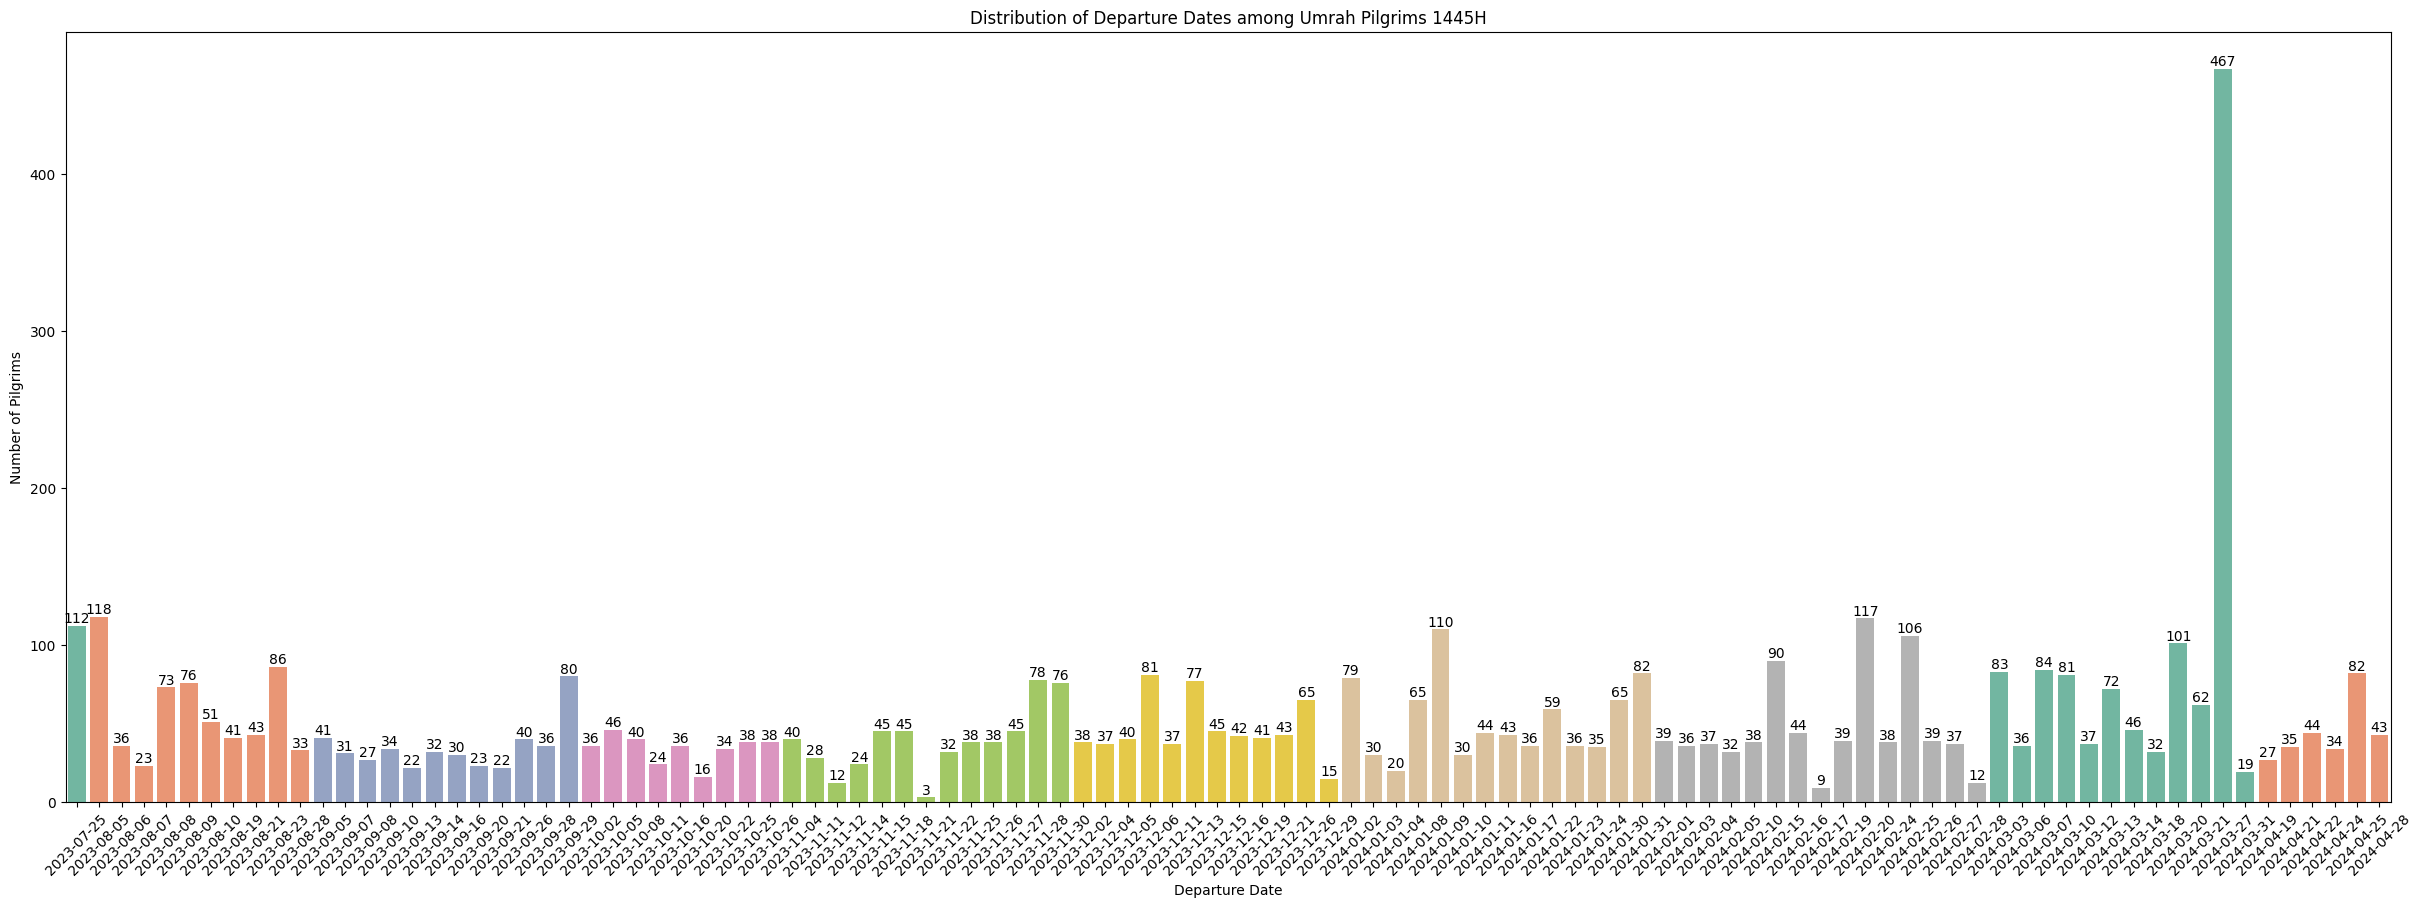

In [31]:
# Membuat palet warna berdasarkan bulan
unique_months = departure_counts.index.month.unique()
colors = sns.color_palette('Set2', len(unique_months))
month_colors = {month: colors[i] for i, month in enumerate(unique_months)}

# Membuat daftar warna untuk setiap tanggal
bar_colors = [month_colors[month] for month in departure_counts.index.month]

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(30, 10))
sns.barplot(x=departure_counts.index, y=departure_counts.values, palette=bar_colors)

# Menambahkan nilai di atas setiap batang
for index, value in enumerate(departure_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Departure Dates among Umrah Pilgrims 1445H')
plt.xlabel('Departure Date')
plt.ylabel('Number of Pilgrims')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Insight:** Dapat dilihat dari hasil visualisasi diatas paling banyak tanggal keberangkatan pada tanggal 27-3-2024 karena pada tanggal itu terdapat 4 group yg berangkat.

**Analisa Bisnis Mengapa Tanggal 27-3-2024 Paling Banyak Jamaah Umroh yang Berangkat:**

- Kesesuaian dengan Liburan Sekolah:

Tanggal 27 Maret 2024 mungkin bertepatan dengan liburan sekolah di banyak negara, termasuk Indonesia. Liburan sekolah adalah waktu yang ideal bagi keluarga untuk melakukan perjalanan religius seperti umroh karena anak-anak tidak harus absen dari sekolah.

- Cuaca yang Menguntungkan:

Bulan Maret umumnya memiliki cuaca yang lebih nyaman di Arab Saudi dibandingkan dengan bulan-bulan musim panas yang ekstrem. Suhu yang lebih sejuk membuat perjalanan lebih nyaman bagi jamaah, terutama yang lebih tua atau memiliki kondisi kesehatan tertentu.

- Kebijakan Visa dan Keberangkatan:

Pemerintah Arab Saudi mungkin mengeluarkan kuota visa tambahan atau lebih mudah diakses selama bulan tertentu untuk mengakomodasi lonjakan permintaan. Selain itu, biro travel mungkin menjadwalkan lebih banyak keberangkatan untuk memenuhi permintaan yang tinggi pada periode tersebut.

In [33]:
# Mengekstrak bulan dan tahun dari kolom 'tanggal_keberangkatan'
df['month_year'] = df['tanggal_keberangkatan'].dt.to_period('M')

# Mengelompokkan data berdasarkan bulan dan tahun, kemudian menghitung jumlah jamaah tiap bulan
monthly_counts = df['month_year'].value_counts().sort_index()

# Mengonversi index menjadi nama bulan
monthly_counts.index = monthly_counts.index.strftime('%B %Y')

disini saya ingin menganalisa jamaah umroh di Fandiego travel paling banyak pada bulan apa?

In [34]:
monthly_counts

month_year
July 2023          112
August 2023        580
September 2023     418
October 2023       308
November 2023      504
December 2023      561
January 2024       734
February 2024      713
March 2024        1120
April 2024         265
Name: count, dtype: int64

paling banyak pada bulan maret 2024 sebanyak 1120 dan februari 2024 sebanyak 713.

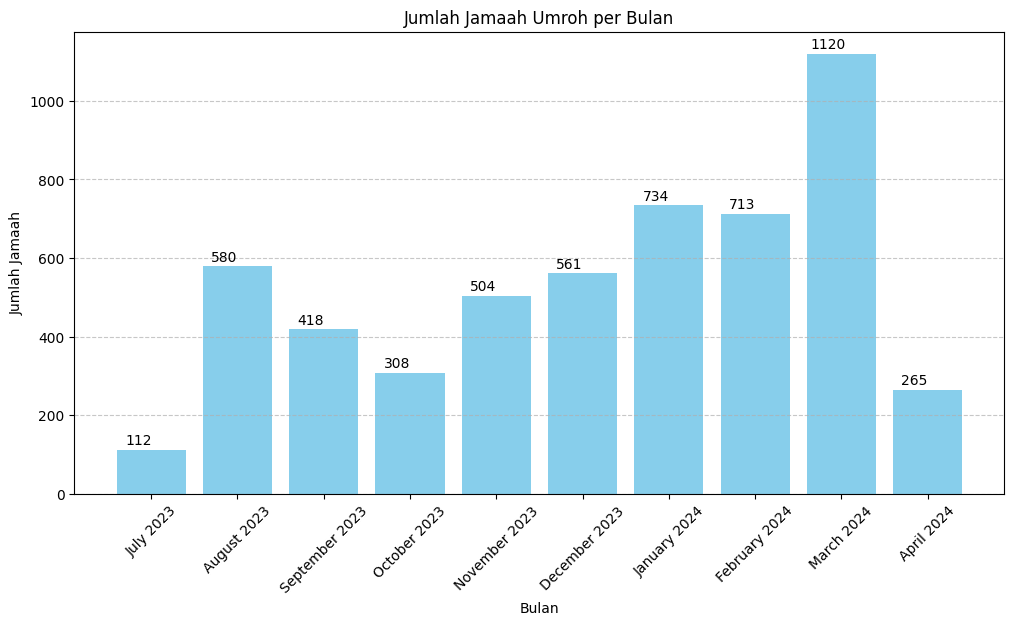

In [35]:
# Visualisasi data
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue')
plt.title('Jumlah Jamaah Umroh per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Jamaah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label pada tiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.15, yval + 5, int(yval), ha='center', va='bottom')

plt.show()


**Analisa Bisnis pada kolom tanggal keberangkatan**

1. Kesesuaian Waktu Liburan dan Iklim:

- Maret 2024: Bulan ini mungkin memiliki cuaca yang lebih sejuk di Arab Saudi, yang lebih nyaman bagi jamaah. Selain itu, ini mungkin menjelang bulan Ramadan, sehingga jamaah memilih waktu ini untuk berumroh.
- Februari 2024: Bulan ini biasanya juga memiliki cuaca yang nyaman dan mungkin bertepatan dengan liburan tertentu di beberapa negara.
- Agustus 2023: Meski ini adalah bulan musim panas, mungkin terdapat program liburan atau promosi khusus yang dilakukan oleh Fandiego Travel, atau adanya permintaan tinggi dari masyarakat yang ingin berumroh pada saat ini.

2. Promosi dan Paket Spesial:

Bulan-bulan tersebut mungkin merupakan bagian dari strategi pemasaran yang melibatkan diskon atau paket spesial yang menarik lebih banyak jamaah.

3. Kebijakan Visa dan Keberangkatan:

Kebijakan visa yang lebih fleksibel atau kuota tambahan dari pemerintah Arab Saudi bisa menjadi faktor pendorong tingginya jumlah jamaah pada bulan-bulan ini

**Rekomendasi Strategis**

1. Pengembangan Paket Promosi Khusus:

- Buat paket umroh dengan penawaran spesial untuk bulan-bulan yang lebih sepi. Misalnya, diskon khusus untuk bulan April 2024 dan bulan-bulan lain yang memiliki jumlah jamaah lebih rendah.
- Sertakan fasilitas tambahan seperti upgrade hotel, tur tambahan, atau diskon untuk anggota keluarga yang berangkat bersama.

2. Optimalisasi Marketing Digital:

- Gunakan kampanye iklan digital yang ditargetkan untuk menarik calon jamaah pada bulan-bulan yang kurang ramai. Manfaatkan media sosial, SEO, dan iklan Google untuk menjangkau audiens yang lebih luas.
- Berikan testimoni dan cerita sukses dari jamaah yang telah berangkat, terutama yang berangkat pada bulan-bulan dengan jumlah jamaah tinggi untuk mendorong kepercayaan calon jamaah.


3. Kemitraan dan Kolaborasi:

- Kerjasama dengan komunitas lokal, lembaga pendidikan, dan organisasi keagamaan untuk mempromosikan paket umroh pada waktu-waktu tertentu.
- Tawarkan program insentif bagi komunitas atau organisasi yang berhasil membawa sejumlah jamaah tertentu.

## 6.3 Kolom Pesawat

In [35]:
df['pesawat'].unique()

array(['Saudi Arabian Airlines', 'Oman Air', 'Turkish Airlines',
       'Garuda Indonesia', 'SriLankan Airlines', 'Qatar Airways',
       'Lion Air', 'Emirates', 'Etihad Airways', 'Dubai'], dtype=object)

In [36]:
# Menghitung frekuensi pesawat
pesawat_counts = df['pesawat'].value_counts()
pesawat_counts

pesawat
Saudi Arabian Airlines    2585
Oman Air                   963
Etihad Airways             403
Turkish Airlines           364
Qatar Airways              323
Emirates                   210
Lion Air                   195
Garuda Indonesia           176
SriLankan Airlines          69
Dubai                       27
Name: count, dtype: int64

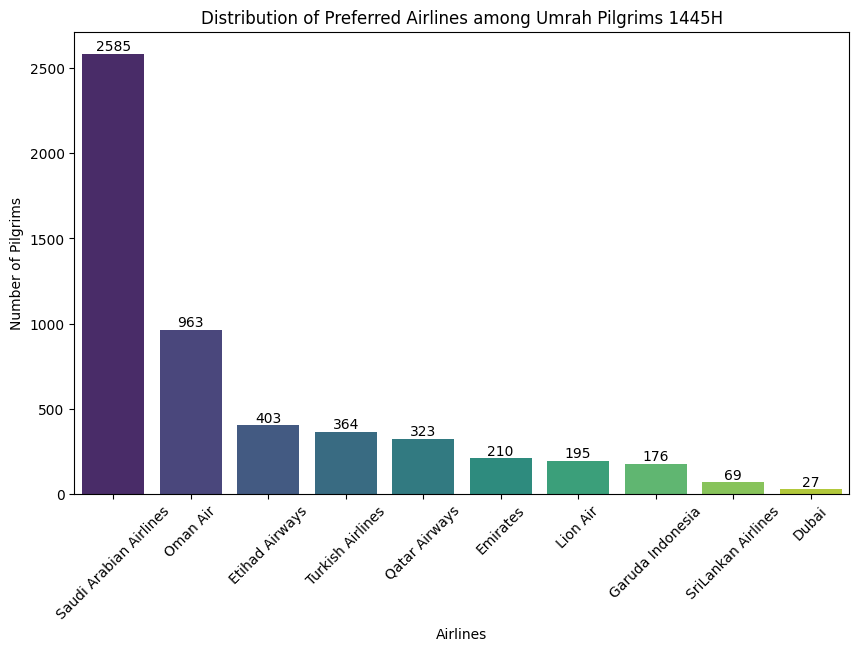

In [37]:
# Visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=pesawat_counts.index, y=pesawat_counts.values, palette='viridis')

# Menambahkan nilai di atas setiap batang
for index, value in enumerate(pesawat_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Preferred Airlines among Umrah Pilgrims 1445H')
plt.xlabel('Airlines')
plt.ylabel('Number of Pilgrims')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Insight Bisnis:**

- Kemitraan dengan Maskapai: Berdasarkan hasil analisis, perusahaan dapat menjalin kemitraan strategis dengan maskapai penerbangan yang paling diminati untuk mendapatkan penawaran khusus atau diskon untuk jamaah umroh.
- Peningkatan Layanan: Menyediakan informasi rinci tentang layanan maskapai penerbangan yang populer, termasuk fasilitas dan kenyamanan yang ditawarkan, dapat membantu jamaah dalam membuat keputusan yang lebih baik.
- Diversifikasi Paket: Menawarkan paket umroh yang mencakup berbagai maskapai penerbangan yang berbeda dapat menarik lebih banyak jamaah dengan preferensi yang beragam.


Dengan strategi ini, perusahaan dapat meningkatkan kepuasan pelanggan, mengoptimalkan kemitraan dengan maskapai, dan meningkatkan jumlah jamaah yang memilih untuk berangkat umroh melalui agen mereka.

**Alasan Kenapa Saudi Arabian Airlines Paling Banyak Diminati**

- Rute Langsung dan Kenyamanan

    - Rute Langsung: Saudi Arabian Airlines mungkin menawarkan rute langsung dari banyak kota asal jamaah ke Jeddah atau Madinah, mengurangi waktu perjalanan dan transit yang seringkali melelahkan.
    - Kenyamanan: Maskapai ini dikenal dengan pelayanan yang baik dan kenyamanan selama penerbangan, yang sangat penting bagi jamaah umroh yang sering kali berusia lanjut.

- Frekuensi Penerbangan

    - Jadwal Fleksibel: Dengan banyaknya jadwal penerbangan yang tersedia, jamaah memiliki lebih banyak pilihan waktu keberangkatan yang sesuai dengan jadwal pribadi mereka.
    - Penerbangan Harian: Frekuensi penerbangan harian atau beberapa kali seminggu membuatnya lebih mudah bagi jamaah untuk menemukan penerbangan yang sesuai dengan rencana perjalanan mereka.

- Fasilitas dan Layanan Khusus

    - Layanan Khusus Umroh: Saudi Arabian Airlines mungkin menawarkan layanan khusus untuk jamaah umroh, seperti makanan halal khusus, perlengkapan ibadah, dan layanan tambahan yang membuat perjalanan lebih nyaman dan spiritual.
    - Bagasi Lebih Banyak: Kebijakan bagasi yang lebih fleksibel atau lebih banyak juga menjadi faktor yang menarik bagi jamaah yang membawa banyak barang atau oleh-oleh.

- Reputasi dan Kepercayaan

    - Reputasi Baik: Maskapai ini memiliki reputasi baik di kalangan jamaah umroh, yang meningkatkan kepercayaan dan preferensi.
    - Keamanan dan Keandalan: Sejarah keamanan dan keandalan penerbangan yang baik membuat jamaah merasa lebih aman dan nyaman terbang dengan maskapai ini.

- Harga Kompetitif dan Paket Menarik

    - Harga Kompetitif: Mungkin juga karena harga tiket yang kompetitif atau diskon khusus untuk jamaah umroh, sehingga menjadi pilihan utama.
    - Paket Menarik: Agen perjalanan mungkin memiliki paket umroh yang menarik dengan maskapai ini, termasuk akomodasi, transportasi, dan layanan lainnya yang bernilai tambah.

**Insight Bisnis & Strategi**

1. Kemitraan Strategis:

    - Diskon dan Penawaran Khusus: Bekerja sama dengan Saudi Arabian Airlines untuk menawarkan diskon khusus atau paket eksklusif bagi jamaah umroh. Ini dapat meningkatkan penjualan dan loyalitas pelanggan.
    - Promosi Bersama: Mengadakan kampanye promosi bersama dengan maskapai untuk menarik lebih banyak jamaah, seperti penawaran early bird atau last-minute deals.

2. Meningkatkan Layanan:

    - Layanan Tambahan: Menyediakan informasi lengkap tentang layanan tambahan yang ditawarkan oleh Saudi Arabian Airlines, seperti fasilitas lounge, makanan spesial, dan perlengkapan ibadah.
    - Feedback Pelanggan: Mengumpulkan feedback dari jamaah tentang pengalaman mereka dengan Saudi Arabian Airlines dan menggunakan informasi ini untuk terus meningkatkan layanan dan kepuasan pelanggan.

3. Diversifikasi Penawaran:

    - Paket Umroh Fleksibel: Menawarkan paket umroh yang lebih fleksibel dengan pilihan berbagai maskapai penerbangan, namun tetap menonjolkan keunggulan Saudi Arabian Airlines untuk pelanggan yang mengutamakan kenyamanan dan pelayanan.

4. Edukasi dan Informasi:

    - Informasi Terperinci: Memberikan edukasi kepada jamaah tentang keuntungan terbang dengan Saudi Arabian Airlines, termasuk kenyamanan, fasilitas, dan rute yang menguntungkan.
    - Webinar dan Workshop: Mengadakan webinar atau workshop untuk calon jamaah yang menjelaskan manfaat terbang dengan Saudi Arabian Airlines dan tips perjalanan umroh yang aman dan nyaman.
    - Dengan memanfaatkan data ini secara efektif, perusahaan travel agency dapat meningkatkan strategi pemasaran, memperkuat kemitraan dengan maskapai yang populer, dan pada akhirnya meningkatkan kepuasan dan loyalitas pelanggan.

## 6.4 Kolom Durasi

In [36]:
df['durasi'].unique()

array([12., 11., 13., 10.,  9.,  8., 15., 14., 35., 18., 17.])

In [37]:
# Menghilangkan spasi tambahan
df['durasi'] = df['durasi'].astype(str).str.strip()

# Mengonversi ke float
df['durasi'] = df['durasi'].astype(float)

# Membulatkan nilai desimal yang tidak relevan
df['durasi'] = df['durasi'].round(0).astype(int)

# Menampilkan hasil yang sudah dibersihkan
print(df['durasi'].unique())

[12 11 13 10  9  8 15 14 35 18 17]


In [38]:
# Menghitung frekuensi durasi perjalanan
durasi_counts = df['durasi'].value_counts()
durasi_counts

durasi
10    1731
12    1163
9     1039
11     542
13     325
14     160
17     140
8       65
15      60
35      45
18      45
Name: count, dtype: int64

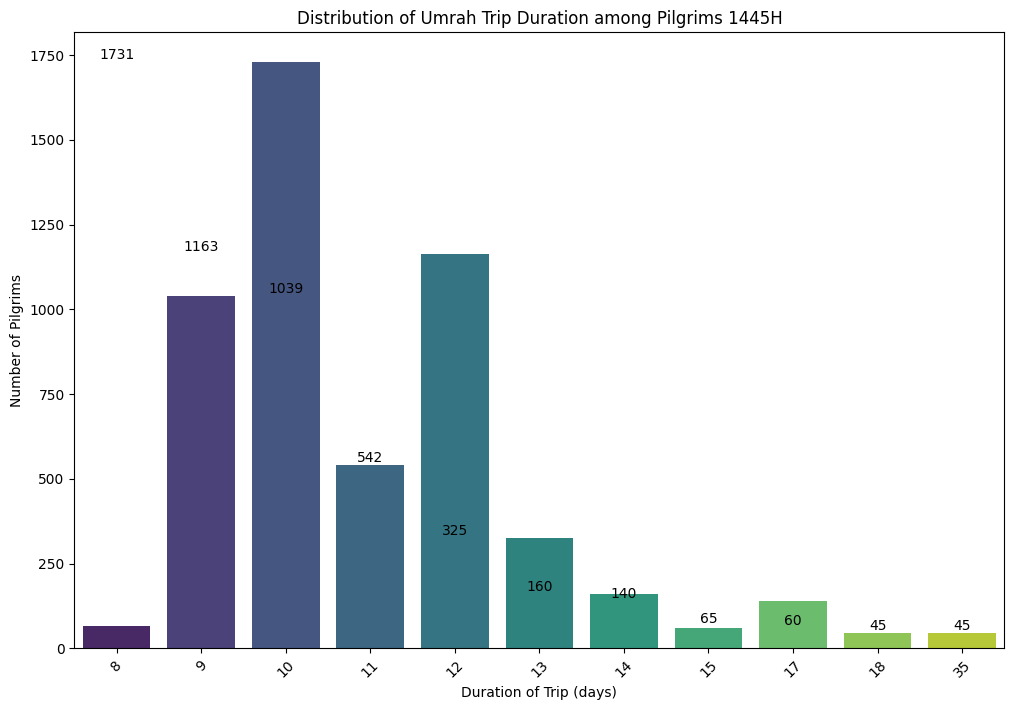

In [39]:
# Visualisasi menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=durasi_counts.index, y=durasi_counts.values, palette='viridis')

# Menambahkan nilai di atas setiap batang
for index, value in enumerate(durasi_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Umrah Trip Duration among Pilgrims 1445H')
plt.xlabel('Duration of Trip (days)')
plt.ylabel('Number of Pilgrims')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Analisis dan Alasan**

1. Durasi 10 Hari yang Paling Populer:

- Kenyamanan dan Praktis: Durasi 10 hari dianggap cukup untuk menyelesaikan rangkaian ibadah umroh tanpa terlalu lama meninggalkan pekerjaan atau kewajiban lainnya.
- Biaya yang Lebih Terjangkau: Paket 10 hari mungkin menawarkan biaya yang lebih rendah dibandingkan dengan paket yang lebih panjang, sehingga lebih terjangkau bagi banyak jamaah.
- Optimalisasi Waktu: Durasi ini memungkinkan jamaah untuk menikmati perjalanan umroh dengan waktu yang cukup untuk beribadah, namun tidak terlalu panjang sehingga bisa cepat kembali ke rutinitas sehari-hari.

2. Durasi 12 dan 9 Hari yang Juga Populer:

- Pilihan Alternatif: Durasi ini mungkin memberikan variasi yang sedikit berbeda dari durasi 10 hari, menyesuaikan dengan preferensi dan kebutuhan jamaah yang ingin sedikit lebih lama atau lebih cepat dalam perjalanan umroh mereka.
- Penawaran Paket yang Beragam: Agen travel mungkin menawarkan paket spesial untuk durasi-durasi ini, termasuk fasilitas tambahan atau pengalaman unik yang menarik bagi jamaah.

**Strategi Pemasaran dan Peningkatan Jumlah Jamaah**

1. Optimalkan dan Diversifikasi Penawaran Paket:
- Paket 10 Hari: Mengingat popularitas paket 10 hari, Fandiego Travel harus terus mempromosikan dan menyempurnakan paket ini. Tawarkan harga yang kompetitif, fasilitas terbaik, dan layanan tambahan yang menarik.
- Variasi Paket: Sediakan paket alternatif dengan durasi 9 dan 12 hari, serta lakukan promosi yang menonjolkan kelebihan masing-masing durasi untuk memberikan pilihan kepada jamaah sesuai kebutuhan mereka.

2. Penawaran Diskon dan Insentif
- Diskon untuk Grup: Tawarkan diskon khusus untuk pendaftaran grup atau keluarga untuk paket durasi populer. Ini bisa menarik lebih banyak jamaah yang ingin berangkat bersama keluarga atau teman.
- Insentif Pendaftaran Awal: Berikan insentif bagi jamaah yang mendaftar lebih awal untuk paket durasi 10 hari atau lainnya. Misalnya, potongan harga atau fasilitas tambahan seperti upgrade kamar.

3. Peningkatan Pelayanan dan Fasilitas
- Peningkatan Kenyamanan: Pastikan bahwa semua paket perjalanan terutama yang berdurasi 9 hari, 10 hari, 12 hari menyediakan fasilitas yang nyaman seperti akomodasi berkualitas, transportasi yang aman, dan layanan pendamping yang ramah dan profesional.
- Peningkatan Makanan dan Minuman: Sediakan pilihan makanan dan minuman berkualitas tinggi yang sesuai dengan selera jamaah. Pertimbangkan kebutuhan diet khusus atau preferensi tertentu.

4. Kampanye Media Sosial dan Testimoni
- Testimoni Jamaah: Gunakan testimoni dari jamaah yang puas dengan durasi perjalanan 9 hari, 10 hari, 12 hari dalam kampanye pemasaran. Video testimoni atau ulasan tertulis bisa meningkatkan kepercayaan calon jamaah.
- Kampanye Media Sosial: Lakukan kampanye media sosial yang terstruktur dengan konten menarik seperti foto, video, dan cerita perjalanan jamaah umroh dengan durasi 9 hari, 10 hari, 12 hari. Gunakan platform seperti Instagram, Tiktok, Facebook, dan YouTube.

5. Paket Edukasi dan Informasi
- Webinar dan Seminar: Adakan webinar atau seminar yang menjelaskan manfaat dan detail dari setiap durasi paket. Jelaskan bagaimana jamaah bisa mendapatkan pengalaman ibadah yang maksimal.
- Brosur dan Panduan: Buat brosur dan panduan yang informatif dan menarik tentang perjalanan umroh berdurasi 9 hari, 10 hari, 12 hari dan lainnya. Bagikan ini di pameran, seminar, dan melalui agen travel.

## 6.5 Kolom Place of birth

In [41]:
df['place_of_birth'].unique()

array(['PURWAKARTA', 'LEWOLEBA', 'SAGU', 'LAMAHALA', 'JAKARTA', 'MADURA',
       'PADANG', 'WAIHAKA', 'METRO', 'PALEMBANG', 'JEPARA',
       'TG BALAI KARIMUN', 'MERAL KARIMUN', 'KARIMUN', 'SURABAYA',
       'BONTANG', 'MEDAN', 'BALIKPAPAN', 'SUBAIM', 'BULUKUMBA',
       'SEMARANG', 'MAKASSAR', 'CILEGON', 'SERANG', 'KALIANDA', 'SLEMAN',
       'SUMBER REJO', 'TANJUNG TIRTO', 'KLATEN', 'TIDORE',
       'GUNUNG SITOLI', 'PEKALONGAN', 'BANTUL', 'CIREBON', 'BANDAR JAYA',
       'TERNATE', 'KAIYASA', 'PROBOLINGGO', 'PURWOKERTO', 'JAKARTA ',
       'BUKIT TNGGI', 'BUKITTINGGI', 'BANDUNG', 'PEKANBARU', 'WONOGIRI',
       'KARANGANYAR', 'BANDA ACEH', 'TASIKMALAYA', 'SOLOK', 'BONJOL ALAM',
       'JEMBER', 'SUKABUMI', 'NABIRE', 'AGAM', 'MADIUN', 'PEKAN BARU',
       'GUNUNG KIDUL', 'MAGELANG', 'TANAH GROGOT', 'PASER',
       'BONJOL PASAMAN', 'PONTIANAK', 'PALANGKA RAYA', 'MSINGKAWANG',
       'BANJAR', 'KEBUMEN ', 'BANDUNG ', 'KEDIRI', 'TEMANGGUNG',
       'KEBUMEN', 'BOJONEGORO', 'CILACAP', '

In [42]:
# Menghapus spasi berlebih
df['place_of_birth'] = df['place_of_birth'].str.strip()
# Mengubah ke huruf kecil
df['place_of_birth'] = df['place_of_birth'].str.lower()
# Mengganti typo atau varian penulisan (contoh)
df['place_of_birth'].replace({'jkt':'jakarta', 'jogja':'yogyakarta'}, inplace=True)


In [43]:
df['place_of_birth'].unique()

array(['purwakarta', 'lewoleba', 'sagu', 'lamahala', 'jakarta', 'madura',
       'padang', 'waihaka', 'metro', 'palembang', 'jepara',
       'tg balai karimun', 'meral karimun', 'karimun', 'surabaya',
       'bontang', 'medan', 'balikpapan', 'subaim', 'bulukumba',
       'semarang', 'makassar', 'cilegon', 'serang', 'kalianda', 'sleman',
       'sumber rejo', 'tanjung tirto', 'klaten', 'tidore',
       'gunung sitoli', 'pekalongan', 'bantul', 'cirebon', 'bandar jaya',
       'ternate', 'kaiyasa', 'probolinggo', 'purwokerto', 'bukit tnggi',
       'bukittinggi', 'bandung', 'pekanbaru', 'wonogiri', 'karanganyar',
       'banda aceh', 'tasikmalaya', 'solok', 'bonjol alam', 'jember',
       'sukabumi', 'nabire', 'agam', 'madiun', 'pekan baru',
       'gunung kidul', 'magelang', 'tanah grogot', 'paser',
       'bonjol pasaman', 'pontianak', 'palangka raya', 'msingkawang',
       'banjar', 'kebumen', 'kediri', 'temanggung', 'bojonegoro',
       'cilacap', 'pendopo', 'gunung meraksa', 'bandar 

In [44]:
# Analisis Distribusi Tempat Lahir
place_of_birth_counts = df['place_of_birth'].value_counts()
print(place_of_birth_counts)

place_of_birth
jakarta       865
bandung       249
bogor         182
bekasi        134
lamongan      117
             ... 
yamaguchi       1
pangkul         1
kupang          1
panjang         1
saung naga      1
Name: count, Length: 761, dtype: int64


In [45]:
place_of_birth_counts.head(20)

place_of_birth
jakarta        865
bandung        249
bogor          182
bekasi         134
lamongan       117
palembang      111
tangerang       99
malang          92
balikpapan      92
medan           83
surabaya        82
padang          75
sukabumi        68
garut           65
tasikmalaya     63
kebumen         62
tegal           58
serang          56
banjarmasin     54
kuningan        52
Name: count, dtype: int64

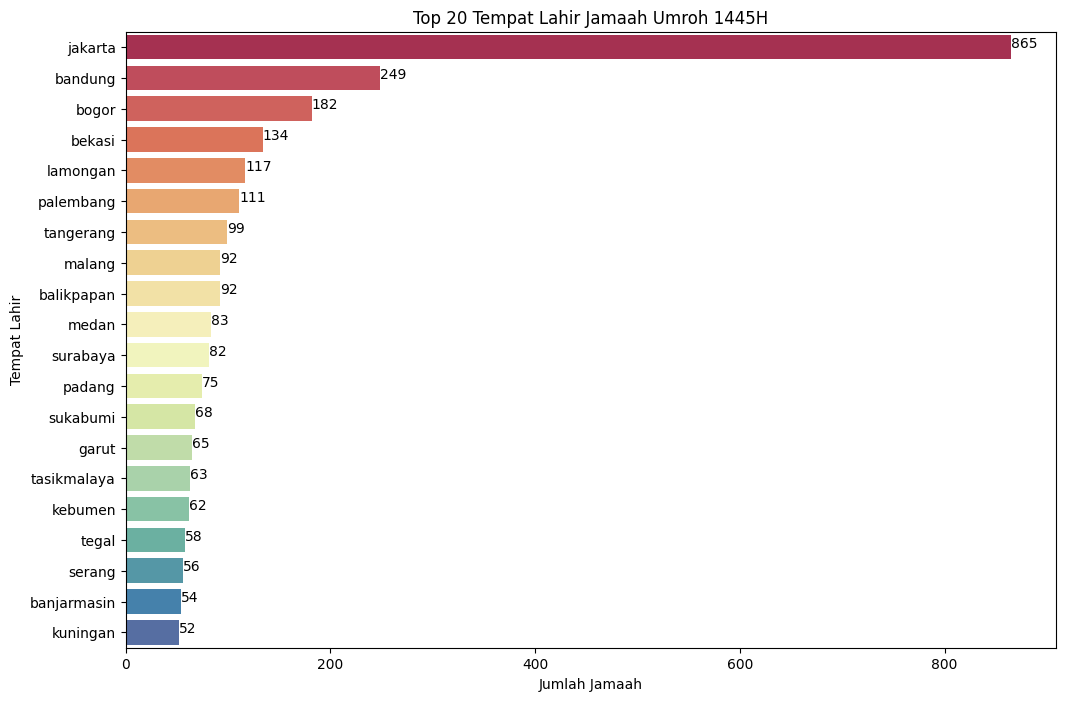

In [46]:
# Visualisasi Tempat Lahir Paling Umum
top_places = place_of_birth_counts.head(20)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_places.values, y=top_places.index, palette='Spectral')

# Menambahkan judul dan label sumbu
plt.title('Top 20 Tempat Lahir Jamaah Umroh 1445H')
plt.xlabel('Jumlah Jamaah')
plt.ylabel('Tempat Lahir')

# Menambahkan label pada setiap batang
for index, value in enumerate(top_places.values):
    barplot.text(value, index, str(value), color='black', ha="left")

# Menampilkan plot
plt.show()


Dapat dilihat dari visualisasi kolom place of birth, jamaah umroh paling banyak yg lahir di kota: Jakarta, bandung, bogor, bekasi.

**Insight Bisnis dari kolom place of birth**

1. Targeted Marketing Campaigns:

- Jakarta: Sebagai kota dengan jumlah jamaah terbanyak, fokus pada kampanye pemasaran besar-besaran di Jakarta. Manfaatkan media lokal, influencer, dan komunitas untuk menyebarkan informasi tentang paket umroh.
- Bandung, Bogor, Bekasi: Kota-kota besar di sekitar Jakarta juga memiliki banyak jamaah. Lakukan kampanye iklan melalui media sosial, billboard, dan event di kota-kota ini.

2. Localized Partnerships:

- Kemitraan dengan Agen Travel Lokal: Kerjasama dengan agen travel lokal di setiap kota untuk menawarkan paket khusus. Misalnya, bekerja sama dengan agen travel di Bandung untuk menawarkan promo khusus bagi warga Bandung.
- Kerjasama dengan Organisasi Keagamaan: Kerjasama dengan masjid-masjid besar dan organisasi keagamaan di kota-kota tersebut untuk menyelenggarakan seminar atau acara terkait umroh.

3. Promosi Spesial dan Diskon:

- Diskon untuk Pendaftaran Grup: Berikan diskon bagi grup dari kota-kota tertentu. Misalnya, diskon tambahan untuk kelompok dari Palembang atau Balikpapan.
- Early Bird Promotion: Tawarkan diskon bagi mereka yang mendaftar lebih awal dari kota-kota dengan jumlah jamaah besar seperti Jakarta, bekasi, bogor dan Bandung.

4. Event dan Pameran Umroh:

- Pameran Umroh di Kota Besar: Selenggarakan pameran umroh di kota-kota besar seperti Jakarta, Bandung, dan Surabaya. Pameran ini bisa menghadirkan berbagai paket umroh, simulasi perjalanan, dan sesi tanya jawab dengan pakar umroh.
- Roadshow di Kota Sedang: Lakukan roadshow di kota-kota dengan jumlah jamaah sedang seperti Balikpapan, Tangerang, dan Palembang untuk meningkatkan kesadaran dan minat umroh.

5. Optimalisasi Digital Marketing:

- SEO dan Iklan Berbayar: Optimalkan situs web dengan konten yang relevan untuk kata kunci terkait umroh dan kota-kota tersebut. Gunakan iklan berbayar di Google dan media sosial untuk menargetkan pengguna dari kota-kota tersebut.
- Testimoni dan Cerita Pelanggan: Bagikan testimoni dan cerita sukses dari jamaah yang berasal dari kota-kota tersebut di media sosial dan situs web untuk menarik lebih banyak jamaah.

## 6.6 Kolom Usia

In [52]:
unique_values_usia = df['usia'].unique()
print("Unique values in column 'usia':")
print(unique_values_usia)

Unique values in column 'usia':
[40.         24.         56.         66.         55.         31.
 22.         58.         64.         59.         44.         61.
 47.         30.         60.         25.         39.         43.
 42.         38.         62.         37.         34.         41.
 45.         51.         73.         35.         33.         74.
 53.         46.         19.         17.         76.         68.
 14.          4.          9.         12.         84.         57.
 52.          8.          6.         63.         48.         54.
 78.         36.         28.          2.         50.         23.
 27.         71.         29.         26.         69.         82.
 16.         70.         79.         32.         49.         13.
 20.         15.         65.         11.         10.         67.
 21.         80.          5.          3.         18.         75.
 77.         72.         86.         81.         87.          7.
 88.          1.         90.          0.         92.      

In [55]:
# Mengelompokkan usia
bins = [0, 12, 17, 35, 59, 100]
labels = ['Anak-anak', 'Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']
df['kelompok_usia'] = pd.cut(df['usia'], bins=bins, labels=labels, right=False)

**Mengelompokkan usia**

Untuk memberikan insight yang lebih bermakna, kita bisa mengelompokkan data usia menjadi beberapa kategori kelompok usia:

- Anak-anak: 0-12 tahun
- Remaja: 13-17 tahun
- Dewasa Muda: 18-35 tahun
- Dewasa: 36-59 tahun
- Lansia: > 60 tahun

In [56]:
# Menghitung jumlah per kelompok usia
kelompok_usia_counts = df['kelompok_usia'].value_counts().sort_index()
kelompok_usia_counts

kelompok_usia
Anak-anak       172
Remaja          126
Dewasa Muda    1384
Dewasa         2704
Lansia          929
Name: count, dtype: int64

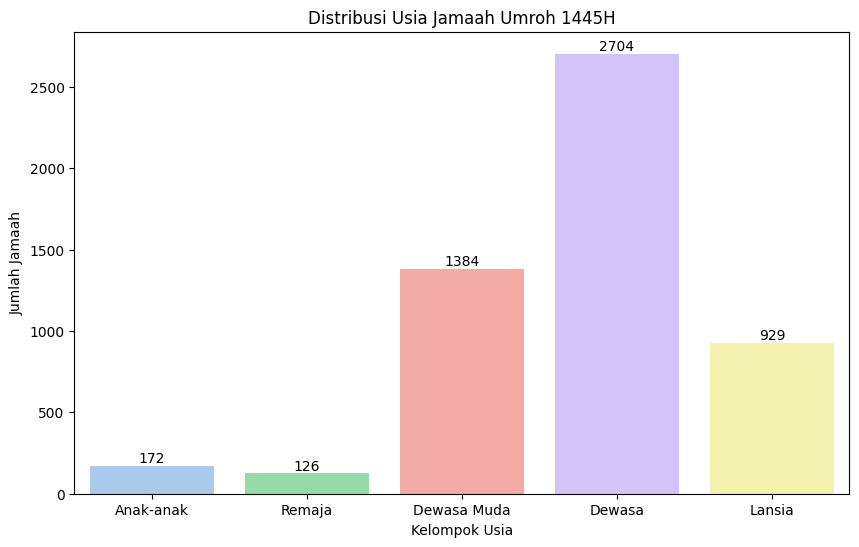

In [57]:
# Visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=kelompok_usia_counts.index, y=kelompok_usia_counts.values, palette='pastel6')

# Menambahkan nilai di atas setiap batang
for index, value in enumerate(kelompok_usia_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribusi Usia Jamaah Umroh 1445H')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Jamaah')
plt.show()

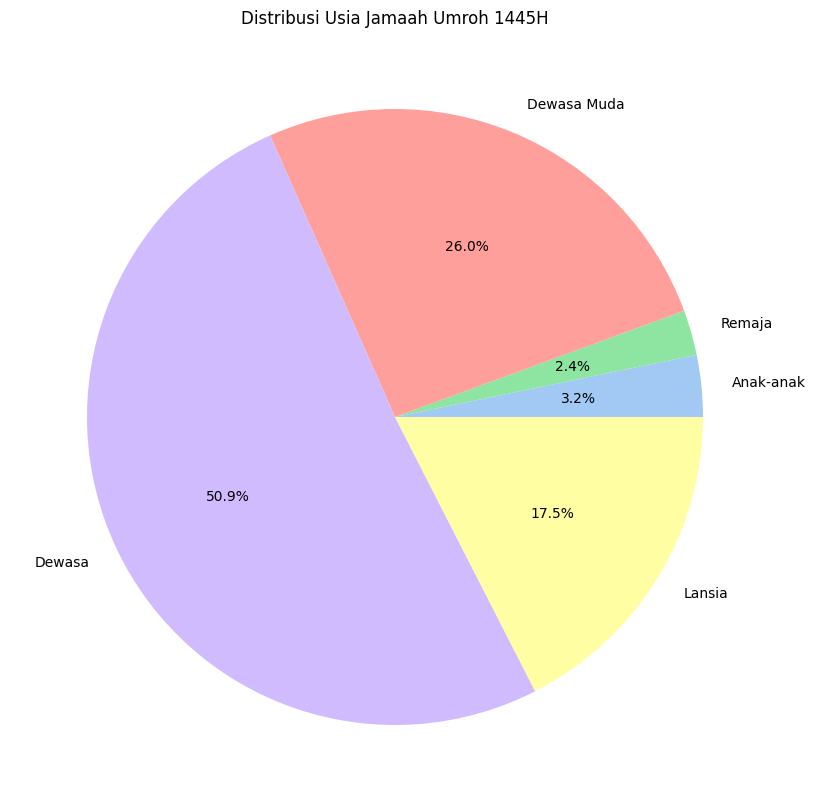

In [58]:
# Membuat pie chart
plt.figure(figsize=(20, 10))
plt.pie(kelompok_usia_counts, labels=kelompok_usia_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel6', len(kelompok_usia_counts)))
plt.title('Distribusi Usia Jamaah Umroh 1445H')
plt.show()

**Analisis dan Alasan**

1. Stabilitas Keuangan:

- Dewasa Muda (18-35 tahun): Pada kelompok usia ini, banyak individu mulai memiliki penghasilan tetap dan stabil, meskipun mungkin belum setinggi kelompok usia dewasa. Mereka memiliki daya beli yang cukup untuk merencanakan perjalanan umroh.
- Dewasa (36-59 tahun): Individu pada usia ini biasanya memiliki karir yang mapan, tabungan, dan penghasilan lebih tinggi, memungkinkan mereka untuk menanggung biaya perjalanan umroh yang lebih besar.

2. Fleksibilitas Waktu:

- Dewasa Muda: Mereka cenderung memiliki lebih sedikit tanggung jawab keluarga (seperti anak-anak kecil) sehingga lebih mudah untuk mengambil cuti panjang untuk perjalanan umroh.
- Dewasa: Meskipun mungkin memiliki tanggung jawab keluarga, mereka biasanya memiliki kontrol lebih besar atas waktu mereka, termasuk cuti yang lebih banyak atau fleksibilitas dalam pekerjaan.

3. Kesehatan dan Stamina:

- Dewasa Muda dan Dewasa: Kedua kelompok usia ini umumnya berada dalam kondisi kesehatan yang baik, memungkinkan mereka untuk menangani tuntutan fisik dari perjalanan umroh.

**Insight Bisnis Berdasarkan Data Usia**

1. Paket Khusus untuk Dewasa Muda:

- Paket Budget-Friendly: Tawarkan paket umroh dengan harga terjangkau untuk menarik perhatian dewasa muda yang mungkin memiliki keterbatasan finansial.
- Promosi di Media Sosial: Manfaatkan platform media sosial yang populer di kalangan dewasa muda, seperti Instagram, TikTok, dan YouTube untuk mempromosikan paket umroh.
- Program Pengalaman: Tawarkan pengalaman unik seperti kegiatan kelompok, tour ke tempat bersejarah, atau program bimbingan khusus yang menarik bagi dewasa muda.

2. Paket Fleksibel untuk Dewasa:

- Paket Keluarga: Sediakan paket umroh keluarga yang menawarkan diskon atau fasilitas tambahan untuk anggota keluarga yang ikut serta. Misalnya, layanan penitipan anak atau aktivitas khusus untuk anak-anak selama umroh.
- Layanan Eksklusif: Berikan layanan eksklusif seperti upgrade hotel, transportasi VIP, dan layanan bimbingan pribadi untuk menarik kelompok usia dewasa yang mungkin mencari kenyamanan ekstra.
- Program Pembiayaan: Tawarkan opsi pembayaran bertahap atau pembiayaan yang fleksibel untuk membantu jamaah merencanakan perjalanan umroh tanpa beban keuangan langsung yang besar.

3. Layanan Kesehatan dan Kenyamanan:

- Asuransi dan Dukungan Medis: Pastikan setiap paket umroh mencakup asuransi perjalanan dan dukungan medis yang memadai, khususnya untuk kelompok usia dewasa yang mungkin memerlukan perhatian kesehatan tambahan.
- Konsultasi Kesehatan Pra-Perjalanan: Sediakan layanan konsultasi kesehatan pra-perjalanan untuk memastikan bahwa semua jamaah dalam kondisi baik sebelum berangkat.

## 6.7 Kolom Issued place

In [59]:
df['issued_place'].unique()

array(['SUKABUMI', 'MAUMERE', 'DEPOK', 'JAKARTA UTARA', 'JAKARTA UATARA',
       'JAKARTA BARAT', 'TERNATE', 'BANDAR LAMPUNG', 'PALEMBANG',
       'BENGKALIS', 'TANJUNG BALAI KARIMUN', 'SURABAYA', 'BALIKPAPAN',
       'SINGKAWANG', 'JAKARTA TIMUR', 'BEKASI', 'SEMARANG', 'KARAWANG',
       'CILEGON', 'SAMPIT', 'PADANG', 'PANGKAL PINANG', 'JAMBI',
       'JAKARTA SELATAN', 'SURAKARTA', 'CIREBON', 'BANDUNG', 'AGAM',
       'TANGERANG', 'MALANG', 'JAKARTA PUSAT', 'SERANG', 'PALANGKARAYA',
       'PONTIANAK', 'CILACAP', 'BOGOR', 'TARAKAN', 'WONOSOBO', 'MEDAN',
       'MUARA ENIM', 'TANJUNG PERAK', 'KALIANDA', 'BANJARMASIN', 'JEMBER',
       'SAMARINDA', 'MAKASSAR', 'INDONESIAN CONSULATE', 'PEMALANG',
       'BATAM', 'PAMEKASAN', 'KEDIRI', 'TEMBILAHAN', 'MATARAM', 'AMBON',
       'YOGYAKARTA', 'TANJUNG PRIOK', 'KUALA TUNGKAL', 'LHOKSEUMAWE',
       'NGURAH RAI', 'BELAWAN', 'PATI', 'SORONG', 'MERAUKE', 'KBRI SEOUL',
       'SOEKARNO HATTA', 'JAKARTA SELATAN ', 'PALU', 'BIMA', 'KOTABUMI',
    

In [60]:
# Normalisasi tempat penerbitan paspor
df['issued_place'] = df['issued_place'].str.strip().str.upper()
df['issued_place'] = df['issued_place'].replace({
    'JAKARTA UATARA': 'JAKARTA UTARA',
    'JAKARTA SELATAN ': 'JAKARTA SELATAN',
    'JAKARTA TIMUR   ': 'JAKARTA TIMUR',
    'JAKART TIMUR': 'JAKARTA TIMUR',
    'TANEGERANG': 'TANGERANG',
    'SAMRINDA': 'SAMARINDA',
    'PANGAKAL PINANG': 'PANGKAL PINANG',
    'SOEKARNO. HATTA': 'SOEKARNO HATTA',
    ' JAKARTA PUSAT': 'JAKARTA PUSAT',
    'CRIEBON': 'CIREBON',
    'JAKARATA BARAT': 'JAKARTA BARAT',
    'SOEKARNO HATTA': 'SOEKARNO HATTA',
    'INDONESIAN CONSULATE': 'INDONESIA'
    # Add more replacements if necessary
})

# Mengecek hasil normalisasi
print(df['issued_place'].unique())

['SUKABUMI' 'MAUMERE' 'DEPOK' 'JAKARTA UTARA' 'JAKARTA BARAT' 'TERNATE'
 'BANDAR LAMPUNG' 'PALEMBANG' 'BENGKALIS' 'TANJUNG BALAI KARIMUN'
 'SURABAYA' 'BALIKPAPAN' 'SINGKAWANG' 'JAKARTA TIMUR' 'BEKASI' 'SEMARANG'
 'KARAWANG' 'CILEGON' 'SAMPIT' 'PADANG' 'PANGKAL PINANG' 'JAMBI'
 'JAKARTA SELATAN' 'SURAKARTA' 'CIREBON' 'BANDUNG' 'AGAM' 'TANGERANG'
 'MALANG' 'JAKARTA PUSAT' 'SERANG' 'PALANGKARAYA' 'PONTIANAK' 'CILACAP'
 'BOGOR' 'TARAKAN' 'WONOSOBO' 'MEDAN' 'MUARA ENIM' 'TANJUNG PERAK'
 'KALIANDA' 'BANJARMASIN' 'JEMBER' 'SAMARINDA' 'MAKASSAR' 'INDONESIA'
 'PEMALANG' 'BATAM' 'PAMEKASAN' 'KEDIRI' 'TEMBILAHAN' 'MATARAM' 'AMBON'
 'YOGYAKARTA' 'TANJUNG PRIOK' 'KUALA TUNGKAL' 'LHOKSEUMAWE' 'NGURAH RAI'
 'BELAWAN' 'PATI' 'SORONG' 'MERAUKE' 'KBRI SEOUL' 'SOEKARNO HATTA' 'PALU'
 'BIMA' 'KOTABUMI' 'SUMBAWA BESAR' 'MEULABOH' 'MANADO' 'PEKANBARU'
 'BANDA ACEH' 'TANJUNG UBAN' 'BENGKULU' 'CIANJUR' 'SIBOLGA' 'DENPASAR'
 'MADIUN' 'TASIKMALAYA' 'PARE-PARE' 'JAYAPURA' 'JAKARTA' 'KENDARI'
 'KBRI MUSCAT' 'KUPA

In [61]:
# Hitung jumlah jamaah berdasarkan tempat penerbitan paspor
issued_place_counts = df['issued_place'].value_counts().reset_index()
issued_place_counts.columns = ['issued_place', 'count']

In [62]:
# Menampilkan jumlah jamaah berdasarkan domisili atau jumlah jamaah berdasarkan tempat penerbitan paspor
issued_place_counts

,issued_place,count
0,JAKARTA TIMUR,433
1,JAKARTA SELATAN,400
2,BEKASI,344
3,DEPOK,271
4,BANDUNG,267
...,...,...
129,KAARAWANG,1
130,KBRI OSAKA,1
131,PANGKAP PINANG,1
132,LABUAN BAJO,1


In [63]:
# 20 teratas issued_place
issued_place_counts.head(20)

,issued_place,count
0,JAKARTA TIMUR,433
1,JAKARTA SELATAN,400
2,BEKASI,344
3,DEPOK,271
4,BANDUNG,267
5,BOGOR,220
6,TANGERANG,196
7,SURABAYA,165
8,JAKARTA PUSAT,158
9,BALIKPAPAN,153


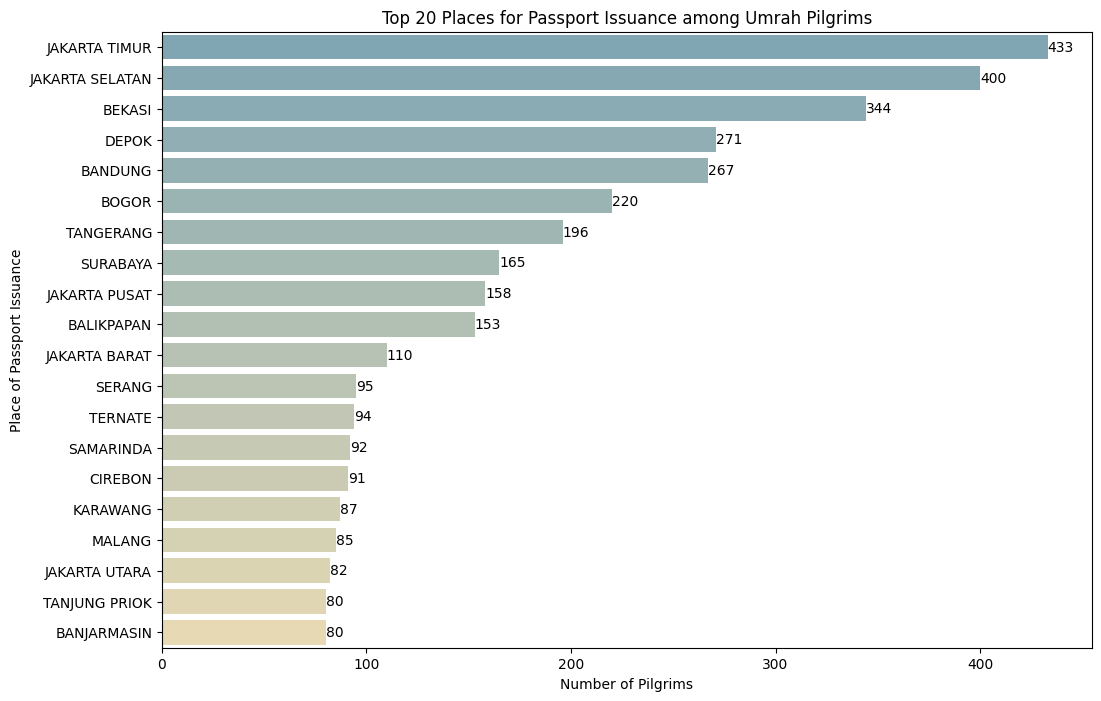

In [66]:
# Membuat visualisasi
plt.figure(figsize=(12, 8))
top_20_issued_places = issued_place_counts.head(20)
barplot = sns.barplot(data=top_20_issued_places, x='count', y='issued_place', palette="blend:#7AB,#EDA")

# Menambahkan judul dan label sumbu
plt.title('Top 20 Places for Passport Issuance among Umrah Pilgrims')
plt.xlabel('Number of Pilgrims')
plt.ylabel('Place of Passport Issuance')

# Menambahkan label pada setiap batang
for index, value in enumerate(top_20_issued_places['count']):
    barplot.text(value, index, str(value), color='black', ha="left", va='center')

# Menampilkan plot
plt.show()

**Insight Bisnis**

1. Fokus pada Area dengan Jumlah Tinggi
- Insight: Berdasarkan data, Jakarta, Bandung, Bogor, dan Bekasi memiliki jumlah jamaah umroh yang tinggi.
- Strategi Marketing:
    - Lokalisasi Promosi: Adakan kampanye pemasaran lokal yang menargetkan wilayah dengan jumlah penerbitan paspor tertinggi.
    - Kemitraan Lokal: Kerjasama dengan lembaga keagamaan, masjid, dan komunitas di area tersebut untuk promosi paket umroh.
    
2. Pengembangan Cabang
- Insight: Membuka cabang atau perwakilan di wilayah dengan jumlah penerbitan paspor yang tinggi dapat mempermudah akses dan pelayanan bagi calon jamaah.
- Strategi:
    - Customer Service Lokal: Menyediakan layanan pelanggan dan konsultasi umroh di kantor cabang setempat.
    - Event dan Seminar: Adakan seminar dan event promosi umroh di kota-kota dengan jumlah jamaah tinggi.

3. Peningkatan Fasilitas Online
- Insight: Kemudahan akses informasi dan pendaftaran secara online dapat meningkatkan minat masyarakat.
- Strategi:
    - Platform Digital: Perkuat platform digital untuk pendaftaran, pembayaran, dan informasi perjalanan umroh.
    - Media Sosial: Gunakan media sosial untuk kampanye iklan berbayar yang menargetkan wilayah dengan banyak penerbitan paspor.

    
Dengan memahami distribusi tempat penerbitan paspor dan menargetkan strategi pemasaran pada daerah dengan potensi tinggi, travel agency dapat meningkatkan jumlah jamaah umroh dan efisiensi kampanye pemasaran.

## 6.8 Kolom Relation

In [67]:
df['relation'].unique()

array(['SINGLE', 'FAMILY', 'SUAMI ISTRI', 'Single', 'single',
       'SUAMI & ISTRI', 'IDCATT', 'AIBRND'], dtype=object)

In [68]:
# Normalisasi kolom 'relation'
df['relation'] = df['relation'].str.strip().str.upper()
df['relation'] = df['relation'].replace({
    'SUAMI ISTRI': 'FAMILY',
    'SUAMI & ISTRI': 'FAMILY',
    'SINGLE': 'SINGLE',
    'single': 'SINGLE',
    'IDCATT': 'OTHER',  # Jika tidak diketahui artinya
    'AIBRND': 'OTHER'  # Jika tidak diketahui artinya
})

# Mengecek hasil normalisasi
print(df['relation'].unique())

['SINGLE' 'FAMILY' 'OTHER']


In [69]:
# Mengelompokkan data yang serupa
relation_counts = df['relation'].value_counts()
relation_counts

relation
SINGLE    2707
FAMILY    2602
OTHER        6
Name: count, dtype: int64

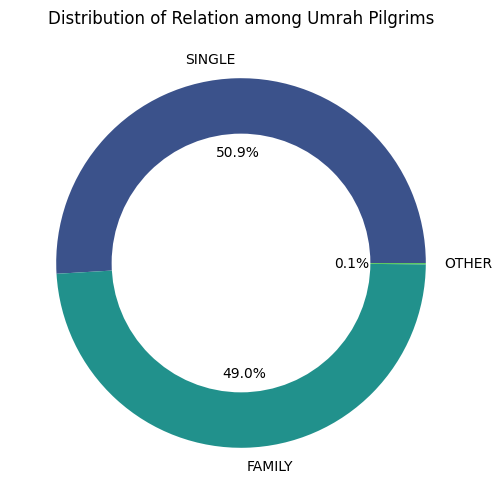

In [70]:
# Membuat donut chart
plt.figure(figsize=(10, 6))
plt.pie(relation_counts, labels=relation_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(relation_counts)))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Relation among Umrah Pilgrims')
plt.show()


**Alasan Kenapa Jamaah SINGLE dan FAMILY yang Paling Banyak**

***Jamaah SINGLE***

1. Fleksibilitas dalam Perencanaan:

Jamaah single memiliki fleksibilitas lebih dalam merencanakan perjalanan umroh tanpa harus mempertimbangkan jadwal atau kebutuhan anggota keluarga lain. Mereka dapat membuat keputusan lebih cepat dan spontan untuk berangkat umroh.

2. Pendapatan Disposabel:

Individu single mungkin memiliki lebih banyak pendapatan disposabel karena mereka tidak memiliki tanggungan keluarga yang besar. Ini memungkinkan mereka untuk lebih mudah membiayai perjalanan umroh.

3. Fokus Spiritual:

Jamaah single sering kali mencari pengalaman spiritual yang mendalam dan pribadi. Perjalanan umroh memberikan mereka kesempatan untuk fokus pada ibadah dan refleksi diri tanpa gangguan tanggung jawab keluarga.

***Jamaah FAMILY***

1. Nilai Keluarga dalam Ibadah:

Bagi banyak keluarga Muslim, umroh adalah kesempatan untuk beribadah bersama sebagai satu kesatuan. Ini adalah cara untuk memperkuat ikatan keluarga dan memberikan pengalaman spiritual bersama.

2. Perencanaan Terkoordinasi:

Keluarga sering kali merencanakan umroh bersama untuk memastikan semua anggota keluarga dapat berbagi pengalaman yang sama. Ini melibatkan perencanaan yang lebih matang dan koordinasi yang baik, tetapi juga memberikan motivasi lebih besar untuk ikut serta.

3. Keamanan dan Kenyamanan:

Melakukan perjalanan umroh bersama keluarga memberikan rasa aman dan nyaman, terutama bagi anggota keluarga yang mungkin tidak terbiasa bepergian sendiri atau merasa lebih aman dalam kelompok.

**Business Insights Kolom Relationship**

1. Paket Khusus untuk Jamaah SINGLE:

- Paket Hemat: Tawarkan paket umroh yang lebih hemat untuk jamaah single, seperti kamar sharing atau penginapan yang lebih ekonomis.
- Aktivitas Kelompok: Sediakan aktivitas kelompok yang memungkinkan jamaah single untuk bertemu dan berinteraksi dengan jamaah lain, seperti tur kota atau kajian agama bersama.

2. Paket Keluarga:

- Diskon Keluarga: Tawarkan diskon khusus untuk paket keluarga, termasuk diskon untuk anak-anak atau anggota keluarga tambahan.
- Fasilitas Keluarga: Sediakan fasilitas tambahan seperti penginapan keluarga, aktivitas untuk anak-anak, dan layanan penitipan anak selama perjalanan umroh.

3. Loyalty Program dan Insentif:

- Loyalty Program: Kembangkan program loyalitas untuk memberikan penghargaan kepada jamaah yang sering melakukan umroh dengan Fandiego Travel, seperti diskon atau fasilitas tambahan untuk perjalanan berikutnya.
- Referral Program: Tawarkan insentif bagi jamaah yang berhasil mengajak teman atau keluarga untuk mendaftar umroh melalui program referral.

4. Kampanye Pemasaran yang Spesifik:

- Target Pasar Single: Buat kampanye pemasaran yang menargetkan individu single dengan menonjolkan fleksibilitas, fokus spiritual, dan kemudahan perencanaan.
- Target Pasar Keluarga: Promosikan paket keluarga dengan menonjolkan pengalaman beribadah bersama, fasilitas keluarga, dan diskon khusus.

## 6.9 Kolom Roomlist 

In [71]:
df['roomlist'].unique()

array(['QUAD', 'TRIPLE', 'DOUBLE', 'QUINT', 'SINGLE', 'TWIN', 'Triple',
       'DOUBLE ', 'QUAD MVHDBHHZ', 'TRIPLE MWPDGCTW', 'DOUBLE MEKKAH',
       'O88BHU', 'O9A7JZ', 'P59VKK', 'P6NOF7'], dtype=object)

In [73]:
# Normalisasi kolom 'roomlist'
df['roomlist'] = df['roomlist'].str.strip().str.upper()
df['roomlist'] = df['roomlist'].replace({
    'TRIPLE': 'TRIPLE',
    'QUAD MVHDBHHZ': 'QUAD',
    'TRIPLE MWPDGCTW': 'TRIPLE',
    'DOUBLE ': 'DOUBLE',
    'DOUBLE MEKKAH': 'DOUBLE',
    'SINGLE': 'TWIN',
    'O88BHU': 'TWIN',
    'O9A7JZ': 'TWIN',
    'P59VKK': 'TWIN', 
    'P6NOF7': 'TWIN'
})

# Mengecek hasil normalisasi
print(df['roomlist'].unique())


['QUAD' 'TRIPLE' 'DOUBLE' 'QUINT' 'TWIN']


**Penjelasan Roomlist**

1. QUAD:

- Maksud: Kamar yang dapat menampung empat orang.
- Implikasi: Ideal untuk keluarga atau grup kecil yang ingin berbagi kamar untuk mengurangi biaya per orang.

2. TRIPLE:

- Maksud: Kamar yang dapat menampung tiga orang.
- Implikasi: Cocok untuk kelompok kecil atau keluarga dengan satu anak.

3. DOUBLE:

- Maksud: Kamar yang dapat menampung dua orang.
- Implikasi: Biasanya dipilih oleh pasangan suami istri atau dua teman yang bepergian bersama.

4. QUINT:

- Maksud: Kamar yang dapat menampung lima orang.
- Implikasi: Dapat digunakan oleh keluarga besar atau grup teman yang ingin menginap bersama.

5. TWIN:

- Maksud: Kamar dengan dua tempat tidur terpisah, biasanya untuk dua orang.
- Implikasi: Ideal untuk dua orang teman yang menginginkan tempat tidur terpisah.

In [74]:
# Mengelompokkan data yang serupa
roomlist_counts = df['roomlist'].value_counts()
print(roomlist_counts)


roomlist
QUAD      4136
DOUBLE     616
TRIPLE     354
QUINT      194
TWIN        15
Name: count, dtype: int64


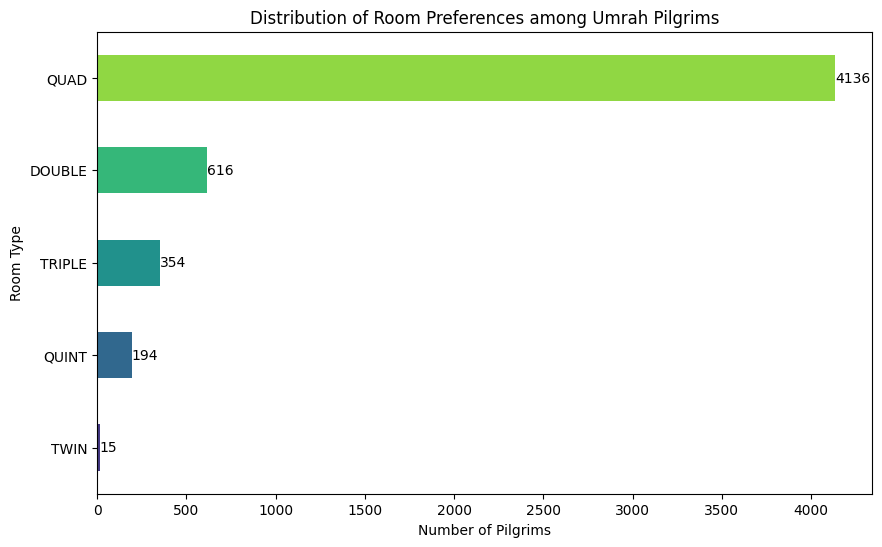

In [75]:
# Membuat horizontal bar chart
plt.figure(figsize=(10, 6))
sorted_counts = roomlist_counts.sort_values()
ax = sorted_counts.plot(kind='barh', color=sns.color_palette('viridis', len(sorted_counts)))

# Menambahkan judul dan label sumbu
plt.title('Distribution of Room Preferences among Umrah Pilgrims')
plt.xlabel('Number of Pilgrims')
plt.ylabel('Room Type')

# Menambahkan label pada setiap batang
for index, value in enumerate(sorted_counts):
    ax.text(value, index, str(value), color='black', va='center')

# Menampilkan plot
plt.show()

**Insight Bisnis & Strategi Peningkatan Marketing Kolom Roomlist**

1. Promosi Paket QUAD:

- Insight: Kamar QUAD paling diminati dengan selisih yang signifikan.
- Strategi: Buat paket promosi yang menonjolkan kenyamanan dan biaya efektif dari kamar QUAD. Tawarkan diskon atau tambahan fasilitas untuk grup yang memilih kamar QUAD.

2. Diversifikasi Paket:

- Insight: Kamar DOUBLE dan TRIPLE juga memiliki jumlah peminat yang signifikan.
- Strategi: Kembangkan paket spesial untuk kamar DOUBLE dan TRIPLE. Tawarkan fleksibilitas dalam durasi dan fasilitas tambahan untuk menarik lebih banyak pelanggan dari segmen ini.

3. Optimasi Penggunaan Kamar QUINT:

- Insight: Kamar QUINT memiliki jumlah peminat yang lebih rendah dibandingkan QUAD.
- Strategi: Promosikan kamar QUINT sebagai pilihan ideal untuk keluarga besar atau grup dengan lebih dari empat orang. Berikan penawaran khusus atau potongan harga untuk kelompok keluarga yang lebih besar.

4. Perbaikan Kamar TWIN:

- Insight: Kamar TWIN memiliki jumlah peminat yang sangat sedikit.
- Strategi: Evaluasi kembali penawaran kamar TWIN, termasuk harga dan fasilitas. Pertimbangkan untuk mengurangi jumlah kamar TWIN atau mengubahnya menjadi tipe kamar lain yang lebih diminati.

5. Analisis Feedback Pelanggan:

- Insight: Mengerti alasan di balik preferensi kamar dapat memberikan wawasan berharga.
- Strategi: Kumpulkan dan analisis feedback dari jamaah terkait pengalaman mereka dengan berbagai tipe kamar. Gunakan data ini untuk menyesuaikan penawaran dan meningkatkan kualitas layanan.

6. Targeted Marketing Campaigns:

- Insight: Segmentasi pasar berdasarkan preferensi kamar.
- Strategi: Lakukan kampanye pemasaran yang ditargetkan untuk segmen tertentu, seperti keluarga besar untuk kamar QUAD dan QUINT, pasangan untuk kamar DOUBLE, dan grup kecil untuk kamar TRIPLE.

## 6.10 Kolom Agent

In [76]:
df['agent'].unique()

array(['Lintang', 'Indhira', 'Afdal', 'Kabian', 'Umi Zakiya', 'Donny',
       'Riki', 'Rudy', 'Rudy/Anita', 'Anita', 'Rahmatika', 'Kantor',
       'Yenni', 'ST', 'Hakim', 'VG', 'Eva', 'RTDR (Rumah Tahfidz)', 'IHC',
       'Uthet', 'Afi', 'Musyafa', 'Akbar', 'Sefri', 'AYT', 'Ust. Chandra',
       'MW', 'Habib Idrus', 'Unung', 'Mufti', 'Ninda', 'Muthowif', 'Zila',
       'Alfy', 'Ust Yasir', 'Husnin', 'Tri Utama', 'Wahyuni',
       'UST Chandra', 'Nona', 'Risa', 'KTF', 'RTDR', 'Pak Husnin',
       'Anez/ Pepy', 'Yeni', 'Bu Ikoh', 'Erni', 'Tri utama', 'Rizal',
       'Chandra', 'RIzal', 'Oscar', 'Bubin', 'Agus', 'Akbar ',
       'Indah Susan', 'Event Jogja', 'Tika/Bagus', 'Laela', 'Yenny',
       'Viza', 'Anne', 'Ariani', 'Mba Icha', 'Meilissa', 'CEO', 'BRI',
       'Fathia', 'EVENT JOGJA', 'Ust Zain', 'Mustofa IBT', 'ANDI ANTONY',
       'Tika', 'UBEPE', 'HENDRA', 'TL', 'Vina', 'Ustad Zein', 'Zuharman',
       'Ditta', 'Rosyid', 'Mila', 'Imran', 'Yasir', 'Om Saf', 'RISKY',
       'Eva ',

In [77]:
# Menghitung jumlah jamaah per agen
agent_counts = df['agent'].value_counts()
print(agent_counts)

agent
Lintang        2488
Yenni           780
Afdal           249
RTDR            203
Kantor          163
               ... 
Ustad Zain        1
 Mutowif          1
Aby Adlyn         1
Habib Jafar       1
Zainal            1
Name: count, Length: 152, dtype: int64


In [78]:
# Mendapatkan Top 10 agen
top_10_agents = agent_counts.head(10)
print("Top 10 agents with most registrations:")
print(top_10_agents)

Top 10 agents with most registrations:
agent
Lintang                 2488
Yenni                    780
Afdal                    249
RTDR                     203
Kantor                   163
Hakim                     98
Sefri                     79
Bubin                     62
RTDR (Rumah Tahfidz)      59
IHC                       58
Name: count, dtype: int64


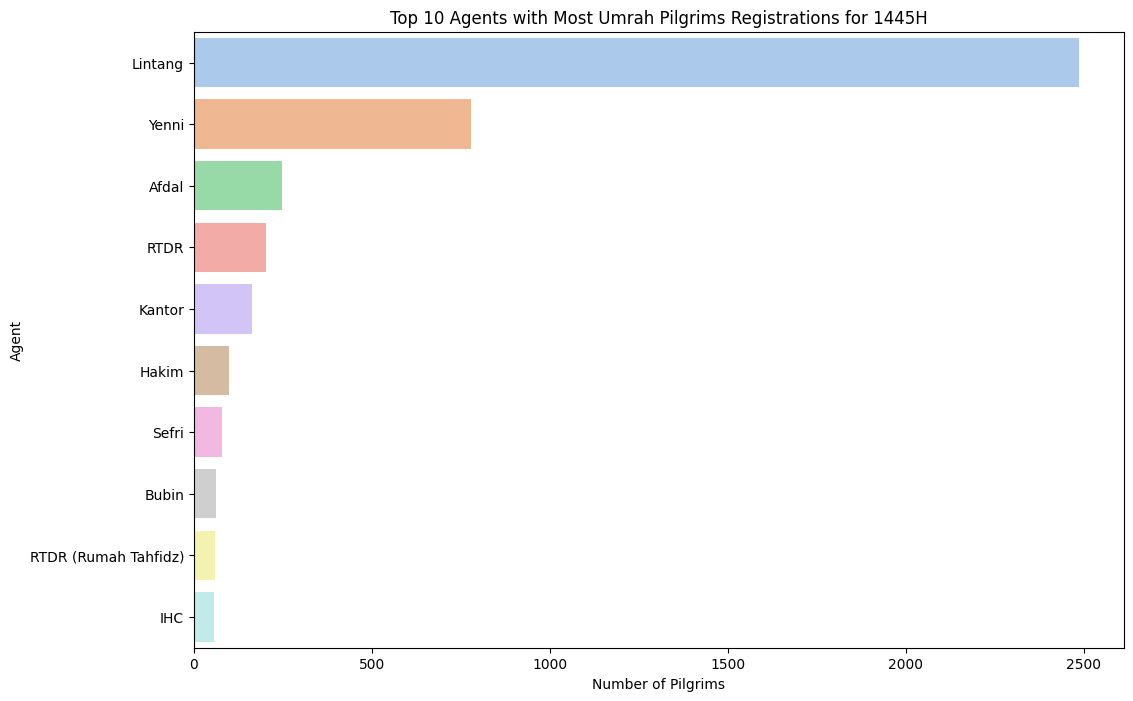

In [82]:
# Membuat visualisasi horizontal bar chart untuk Top 10 agen
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_agents.values, y=top_10_agents.index, palette="pastel")
plt.title('Top 10 Agents with Most Umrah Pilgrims Registrations for 1445H')
plt.xlabel('Number of Pilgrims')
plt.ylabel('Agent')
plt.show()

**Insight Bisnis untuk Meningkatkan Marketing pada kolom agent**

1. Penghargaan dan Insentif untuk Agen Top

- Insight: Agen seperti Lintang dan Yenni memiliki performa pendaftaran yang sangat tinggi, menunjukkan bahwa mereka memiliki strategi pemasaran yang efektif atau akses ke segmen pelanggan yang besar.
- Strategi: Berikan penghargaan dan insentif tambahan untuk agen top ini. Misalnya, program bonus berbasis kinerja, penghargaan tahunan, atau perjalanan gratis ke Tanah Suci sebagai apresiasi atas kerja keras mereka.

2. Pelatihan dan Pengembangan Agen

- Insight: Agen-agen yang berhasil mungkin memiliki teknik atau strategi khusus yang bisa diajarkan kepada agen lain.
- Strategi: Adakan sesi pelatihan dan berbagi pengetahuan di mana agen top dapat berbagi strategi sukses mereka. Ini akan membantu agen lain untuk meningkatkan keterampilan dan kemampuan mereka dalam menarik jamaah.

3. Kolaborasi dengan Agen Top untuk Kampanye Pemasaran

- Insight: Agen top dapat menjadi wajah kampanye pemasaran karena mereka memiliki kredibilitas dan pengalaman yang terbukti.
- Strategi: Libatkan agen top dalam kampanye pemasaran, baik melalui media sosial, seminar, atau acara-acara lainnya. Testimoni dari agen yang sukses dapat menarik calon jamaah lainnya.

4. Fokus pada Agen yang Menjanjikan

- Insight: Agen dengan performa menengah seperti Afdal, RTDR, dan Kantor menunjukkan potensi yang baik dan mungkin hanya membutuhkan sedikit dorongan untuk mencapai performa yang lebih tinggi.
- Strategi: Berikan mereka lebih banyak dukungan, baik berupa materi pemasaran tambahan, pelatihan lanjutan, atau insentif yang menarik. Identifikasi apa yang menghalangi mereka dari mencapai performa yang lebih tinggi dan bantu mereka mengatasi hambatan tersebut.

## 6.11 Kolom Price

In [83]:
df['price'].unique()

array([  inf,  29.9,  30.9,  38.9,  36.9,   9. ,  27.9,  26.9,   0. ,
        28.9,  34.9,  28.4,   8. ,  27.5,  17. ,  49.8,  23.9,  44.8,
        31.9,  12.9,  25. ,  37.8,   8.5,  39.8,  35.9,  17.9,  15. ,
        95. ,  24. ,  26. ,  30. ,  25.9,  33.9,  30.5,  32.9,  41.9,
        24.9,  21.9,  20.9,  22.9,  85.9,  35.4,   5. ,  55.9, 102.9,
        37.9,  23. ,  13.8,  13.1,  28. ,  52.8,  78.9,  39.9,  43.9,
        45.9,  20. ,  29. ,   6. ])

In [84]:
# Menggantikan nilai infinity dengan NaN
df['price'].replace([np.inf, 0], np.nan, inplace=True)

In [85]:
# Menghapus nilai NaN jika ada
df.dropna(subset=['price'], inplace=True)

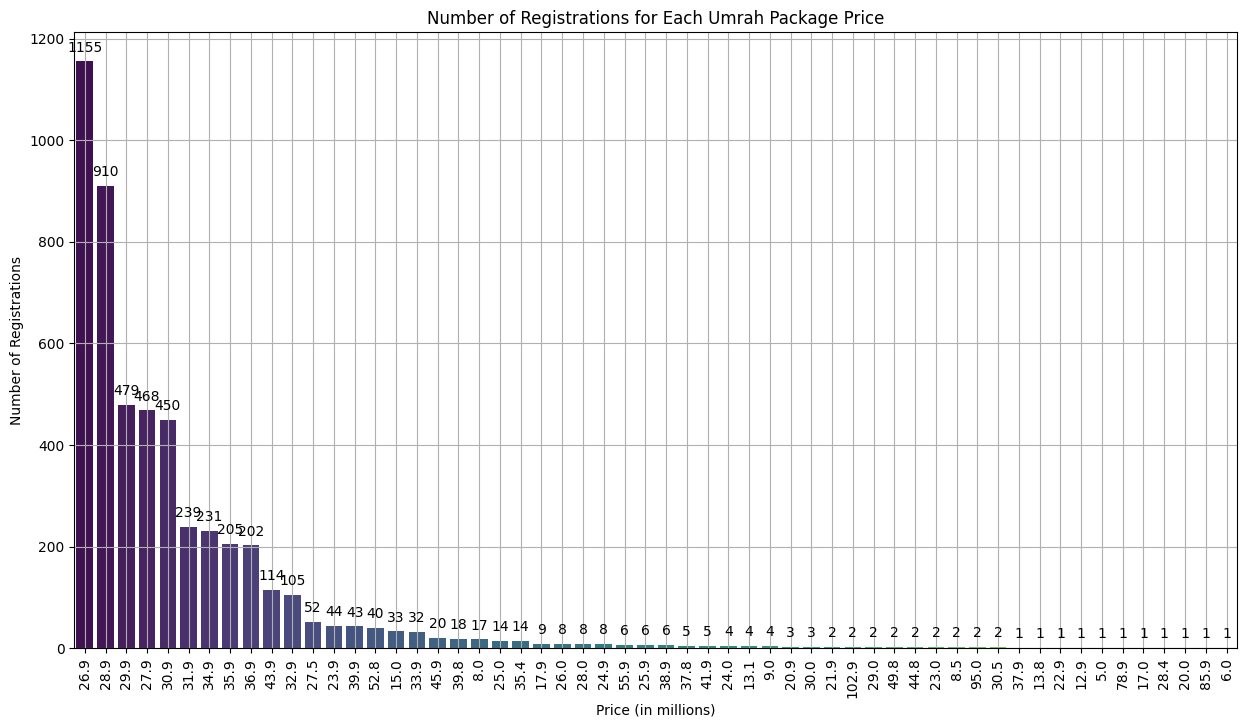

In [86]:
# Visualization: Countplot
plt.figure(figsize=(15, 8))
countplot = sns.countplot(data=df, x='price', order=df['price'].value_counts().index, palette='viridis')

# Menambahkan label jumlah jamaah pada setiap bar
for patch in countplot.patches:
    height = patch.get_height()
    if height > 0:
        countplot.annotate(f'{int(height)}', 
                           xy=(patch.get_x() + patch.get_width() / 2, height), 
                           xytext=(0, 5), 
                           textcoords='offset points', 
                           ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Registrations for Each Umrah Package Price')
plt.xlabel('Price (in millions)')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

**Insight Bisnis dan Strategi Marketing pada kolom price**

1. Penawaran Paket Utama

- Fokus pada Harga Populer: Mengingat paket dengan harga 26,9 juta, 28,9 juta, dan 30,9 juta adalah yang paling diminati, travel agency dapat memfokuskan penawaran dan promosi pada harga-harga ini. Menyediakan beberapa varian paket dengan fasilitas berbeda pada rentang harga tersebut dapat menarik lebih banyak calon jamaah.

2. Bundling dan Promosi

- Diskon untuk Paket Keluarga: Tawarkan diskon khusus untuk keluarga atau grup yang memilih paket dalam rentang harga populer ini. Misalnya, diskon untuk grup minimal 4 orang dengan harga 26,9 juta atau 28,9 juta.
- Promosi Early Bird: Berikan diskon atau fasilitas tambahan (seperti upgrade kamar atau layanan eksklusif) untuk jamaah yang memesan paket lebih awal pada harga-harga ini.

3. Fleksibilitas Pembayaran

- Program Cicilan: Mengingat harga 26,9 juta hingga 30,9 juta cukup kompetitif, menawarkan program cicilan tanpa bunga atau dengan bunga rendah dapat menarik calon jamaah yang memiliki keterbatasan dana saat ini.
- Kemitraan dengan Bank atau Lembaga Keuangan: Bekerja sama dengan bank atau lembaga keuangan untuk menyediakan opsi pembiayaan atau cicilan bagi jamaah.

4. Peningkatan Layanan

- Tambahan Fasilitas: Berikan tambahan fasilitas seperti Wi-Fi gratis, layanan makan lebih baik, atau fasilitas ziarah tambahan untuk paket dengan harga yang populer.
- Customer Experience: Fokus pada peningkatan pengalaman pelanggan dengan memastikan kualitas layanan yang konsisten dan memuaskan untuk menjaga loyalitas pelanggan dan mendapatkan rekomendasi dari mulut ke mulut.

5. Strategi Pemasaran

- Kampanye Media Sosial: Manfaatkan platform media sosial untuk mempromosikan paket-paket ini dengan testimoni dari jamaah yang puas, foto-foto perjalanan, dan penawaran khusus.
- Influencer dan Tiktoker: Ajak influencer atau Tiktoker yang memiliki pengikut yang relevan untuk mengikuti paket umroh dengan harga populer ini dan membagikan pengalaman mereka.
- Webinar dan Seminar: Adakan webinar atau seminar tentang persiapan umroh dan undang calon jamaah untuk mengenal lebih dalam tentang paket-paket yang ditawarkan, terutama yang berada dalam harga 26,9 juta hingga 30,9 juta.

6. Optimasi Digital

- SEO dan Iklan Online: Optimalkan situs web travel agency untuk SEO dengan fokus pada kata kunci terkait harga paket umroh. Jalankan iklan online yang menargetkan calon jamaah yang mencari informasi tentang paket umroh dengan harga spesifik tersebut.

# 7. Conclusion

Dari project ini dapat disimpulkan bahwa:

1. Total jamaah yang berangkat umroh dengan travel Fandiego sebanyak: `5315 orang`
2. Total group yang berangkat umroh dengan travel Fandiego sebanyak:
    - Juli = `1 group`
    - Agustus = `12 group`
    - September = `13 group`
    - Oktober = `9 group`
    - November = `15 group`
    - Desember = `16 group`
    - Januari = `21 group`
    - februari = `20 group`
    - Maret = `20 group`
    - April = `11 group`
    - ------------------------------------------------------------------------------    +
        
        Total = `138 group`

3. Bulan yang paling banyak melakukan pemberangkatan jamaah umroh 3 terbesar yaitu pada bulan: 
    - January 2024: `704 orang`
    - February 2024: `627 orang`
    - March 2024: `1028 orang`
4. Dari analisa data pada kolom gender diperoleh insight bahwa jamaah umroh pada 1445 H, gender wanita yaitu sebanyak `3270 orang` dan  pria yaitu sebanyak `2045 orang`. Untuk presesntasenya `wanita: 61,5% & pria: 38,5%`.
5. Dari analisa data pada kolom tanggal keberangkatan diperoleh insight bahwa, tanggal keberangkatan paling banyak dari jamaah umroh 1445 Hijriah adalah pada tanggal 27-3-2024 yaitu sebanyak `4 groups` yang berangkat dengan total jamaah sebanyak `467 orang`.
6. Bulan yang paling banyak jamaah umroh yang berangkat pada bulan: `August Maret 2024, Februari 2024 dan August 2023.`
7. Pesawat yang paling banyak digunakan oleh jamaah umroh 1445 Hijriah adalah `Saudi Arabian Airlines, Oman Air & Etihad Airways`.
8. Paket umroh berapa hari atau durasi perjalanan berapa hari yang paling banyak diminati oleh jamaah umroh 1445 Hijriah adalah `10 hari, 9 hari & 12 hari`.
9. Tempat Kelahiran paling banyak dari jamaah umroh 1445 Hijriah adalah `jakarta, bandung, bogor & bekasi`.
10. Usia dan kelompok usia dari jamaah umroh yaitu `Dewasa Muda: 18-35 tahun & Dewasa: 36-59 tahun`.
11. Tempat paling banyak menerbitkan paspor atau dokumen dari jamaah umroh yaitu `Jakarta, Depok, Bekasi, Bogor dan Bandung`.
12. Relations jamaah umroh paling banyak yaitu `single kemudian family`.
13. Preferensi kamar yang paling banyak disukai oleh jamaah umroh 1445H adalah `QUAD`.
14. Agent yang paling banyak mendaftarakan jamaah umroh 1445H adalah `teh lintang, kak yenni dan kak Afdal`.
15. Harga paket yang paling diminati oleh jamaah umroh 1445H adlah `26,9 jt, 28,9 jt & 29,9 jt`.